In [1]:
#launch spark 
import pyspark
import dxpy
import dxdata
import pandas as pd
import numpy as np
sc = pyspark.SparkContext()
spark = pyspark.sql.SparkSession(sc)

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/cluster/dnax/jars/dnanexus-api-0.1.0-SNAPSHOT-jar-with-dependencies.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/cluster/spark/jars/log4j-slf4j-impl-2.17.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2023-09-07 16:34:59.428 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-09-07 16:35:00.497 WARN  Utils:69 - Service 'org.apache.spark.network.netty.NettyBlockTransferService' could not bind on port 43000. Attempting port 43001.
2023-09-07 16:35:00.816 WARN  MetricsReporter:84 - No metrics configured for reporting
2023-09-07 16:35:00.818 WARN  LineProtoUsageReporter:48 - Telegraf configurations: url [metrics.push.telegraf.hostport], user [metrics.push.telegraf.user] or password [metrics.push.telegraf.password] missing.
2023-09-07 16:35:00.818 WARN  MetricsReporter:117 - metrics.scraping.httpserver.port


In [2]:
#this is the net phq2 group; no findings; includes all the people with strokes before phq2 i0

In [3]:
#prep database 
dispensed_database_name = dxpy.find_one_data_object(classname="database", name="app*", folder="/", name_mode="glob", describe=True)["describe"]["name"]
dispensed_dataset_id = dxpy.find_one_data_object(typename="Dataset", name="app*.dataset", folder="/", name_mode="glob")["id"]

In [4]:
#prep dataset
dataset = dxdata.load_dataset(id=dispensed_dataset_id)
participant = dataset["participant"]

In [5]:
#pull all relevant columns
field_names = ["eid", "p31", "p189", "p21000_i0", "p21001_i0", "p1558_i0", "p20002_i0", "p21003_i0", "p4079_i0_a0", "p4080_i0_a0", "p131298", "p6150_i0", "p131286", "p131294", "p130814", "p130706", "p130708", "p21021_i0", "p53_i0", "p41271", "p41270", "p130892", "p130894", "p130896", "p2050_i0", "p2060_i0", "p2050_i1", "p2060_i1", "p130838", "p131056", "p131058", "p131180", "p131360", "p131362", "p131364", "p131366", "p131368", "p131370", "p131372", "p131374", "p131376", "p131378", "p20116_i0", "p22032_i0", "p20003_i0", "p40000_i0"]
df = participant.retrieve_fields(names=field_names, engine=dxdata.connect())

2023-09-07 16:35:11.455 WARN  ShellBasedUnixGroupsMapping:210 - unable to return groups for user X6Z7pbGK1BpZKzY6YvJPQ1P7VZZ5yVG7B6xkKgf6__project-GG7jpPjJ4VK0VKqV89494XV5
PartialGroupNameException The user name 'X6Z7pbGK1BpZKzY6YvJPQ1P7VZZ5yVG7B6xkKgf6__project-GG7jpPjJ4VK0VKqV89494XV5' is not found. id: ‘X6Z7pbGK1BpZKzY6YvJPQ1P7VZZ5yVG7B6xkKgf6__project-GG7jpPjJ4VK0VKqV89494XV5’: no such user
id: ‘X6Z7pbGK1BpZKzY6YvJPQ1P7VZZ5yVG7B6xkKgf6__project-GG7jpPjJ4VK0VKqV89494XV5’: no such user

	at org.apache.hadoop.security.ShellBasedUnixGroupsMapping.resolvePartialGroupNames(ShellBasedUnixGroupsMapping.java:294)
	at org.apache.hadoop.security.ShellBasedUnixGroupsMapping.getUnixGroups(ShellBasedUnixGroupsMapping.java:207)
	at org.apache.hadoop.security.ShellBasedUnixGroupsMapping.getGroups(ShellBasedUnixGroupsMapping.java:97)
	at org.apache.hadoop.security.JniBasedUnixGroupsMappingWithFallback.getGroups(JniBasedUnixGroupsMappingWithFallback.java:51)
	at org.apache.hadoop.security.Groups$Gro

In [6]:
#create pandas dataframe
pdf = df.toPandas()

2023-09-07 16:35:37.343 WARN  package:69 - Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [7]:
#check that pandas conversion worked
pdf.head(10)
len(pdf)

502407

In [106]:
#rename columns
pdf_rename = pdf.rename(columns={'eid': 'pID', 'p31': 'male', 'p189': 'tdi', 'p21000_i0': 'ethnicity', 'p21001_i0': 'bmi', 'p1558_i0': 'alc_freq', 'p20002_i0': 'sr_illness', 'p21003_i0': 'age_i0', 'p4079_i0_a0': 'dias_bp', 'p4080_i0_a0': 'sys_bp', 'p131298': 'i21_date', 'p6150_i0': 'vasc_diag', 'p131298': 'i21_date', 'p131286': 'i10_date', 'p131294': 'i15_date', 'p130814': 'e78_date', 'p130706': 'e10_date', 'p130708': 'e11_date', 'p21021_i0': 'asi', 'p21021_i0': 'asi', 'p53_i0': 'date_i0', 'p41271': 'icd9', 'p41270': 'icd10', 'p130892': 'f31_date',  'p130894': 'f32_date', 'p130896': 'f33_date', 'p2050_i0': 'phq2_1', 'p2060_i0': 'phq2_2', 'p2050_i1': 'phq2_1_1', 'p2060_i1': 'phq2_2_1', 'p130838': 'f01_date', 'p131056': 'g45_date', 'p131058': 'g46_date', 'p131180': 'h34_date', 'p131360': 'i60_date', 'p131362': 'i61_date', 'p131364': 'i62_date', 'p131366': 'i63_date', 'p131368': 'i64_date', 'p131370': 'i65_date', 'p131372': 'i66_date', 'p131374': 'i67_date', 'p131376': 'i68_date', 'p131378': 'i69_date', 'p20116_i0': 'smok_stat', 'p22032_i0': 'ipaq', 'p20003_i0': 'rx', 'p40000_i0': 'date_death'})

In [107]:
#check that rename worked
pdf_rename.head(5)

,pID,male,tdi,ethnicity,bmi,alc_freq,sr_illness,age_i0,dias_bp,sys_bp,...,i64_date,i65_date,i66_date,i67_date,i68_date,i69_date,smok_stat,ipaq,rx,date_death
0,2566968,0,1.23310,1001.0,21.2270,2.0,None,50,113.0,190.0,...,None,None,None,None,None,None,1.0,1.0,[2038460150],None
1,1882101,0,1.09023,1001.0,31.5501,5.0,None,41,76.0,121.0,...,None,None,None,None,None,None,2.0,2.0,"[1140876136, 1140883504]",None
2,3039452,1,-4.27277,1001.0,22.6630,2.0,"[1220, 99999, 1465]",56,NaN,NaN,...,None,None,None,None,None,None,0.0,2.0,"[1140868226, 1140874744, 1140861958]",None
3,3859804,1,-2.06036,1001.0,23.6377,1.0,"[1413, 1405, 1417]",60,107.0,185.0,...,None,None,None,None,None,None,0.0,1.0,[1140868226],None
4,1504147,1,-3.14689,1001.0,24.9653,2.0,"[1065, 1111, 1608, 1473, 1452]",65,74.0,158.0,...,None,None,None,None,None,None,0.0,NaN,"[1140879802, 1140860806, 1140861958]",None


In [108]:
pdf_rename['ethnicity'] = pdf_rename['ethnicity'].astype(str)

In [109]:
#pdf_rename['white_yes'] = pdf_rename['ethnicity'].isin(['1', '1001', '1002', '1003']).astype(int)

In [110]:
def update_whiteyes(value):
    if value == '1.0' or value == '1001.0' or value == '1002.0' or value == '1003.0':    
        return 1
    return 0

pdf_rename['white_yes'] = pdf_rename['ethnicity'].apply(update_whiteyes)

In [111]:
sum_white = pdf_rename['white_yes'].sum()

print("Sum of white:", sum_white)

Sum of white: 472609


In [112]:
#drop alc_freq values for "prefer not to answer"/-3
#pdf_rename = pdf_rename[~(pdf_rename['alc_freq'] == -3)]
len(pdf_rename)

502407

In [113]:
#reorder alc_freq values 
#if 4	One to three times a month | 5	Special occasions only | 6	Never, then make seldom=1
#if 2	Three or four times a week | 3	Once or twice a week, then make sometimes=2
#if 1	Daily or almost daily, then make daily=3
pdf_rename['alc_freq_filter'] = np.where(pdf_rename['alc_freq'].isin([2, 3, 4, 5, 6]), 1, 
                             np.where(pdf_rename['alc_freq'].isin([1]), 0, np.nan))

In [114]:
#convert sr_illness to string
pdf_rename['sr_illness'].dtype
pdf_rename['sr_illness'] = pdf_rename['sr_illness'].astype(str)

In [115]:
#for smoking status, drop anyone who answered "-3/prefer not to answer"
pdf_rename['smok_stat'] = pdf_rename['smok_stat'].astype(str)
#pdf_rename = pdf_rename[~pdf_rename['smok_stat'].str.contains('-3')]
len(pdf_rename)

502407

In [116]:
pdf_rename['smok_stat'] = pd.to_numeric(pdf_rename['smok_stat'], errors='coerce')

In [117]:
#reorder smok values 
def smok_values(value):
    if value in [1, 2]:
        return 1
    elif value == 0:
        return 0
    else:
        return None 

pdf_rename['smok_stat_filter'] = pdf_rename['smok_stat'].apply(smok_values)

In [118]:
#calculate pulse pressure (PP)
pdf_rename['pp'] = pdf_rename['sys_bp']-pdf_rename['dias_bp']

In [119]:
#convert date columns to days format
import datetime
pdf_rename['i21_time'] = (pdf_rename['date_i0'] - pdf_rename['i21_date']).dt.days
len(pdf_rename)

502407

In [120]:
#convert vasc_diag to string
pdf_rename['vasc_diag'].dtype
pdf_rename['vasc_diag'] = pdf_rename['vasc_diag'].astype(str)
#drop px who report prior vascular diagnoses of HA, STROKE, PREFER NOT TO ANSWER
#pdf_rename = pdf_rename.loc[(pdf_rename['vasc_diag'] == '[-7]') | (pdf_rename['vasc_diag']  == '[4]') | (pdf_rename['vasc_diag']  == '[2]') | (pdf_rename['vasc_diag']  == '[1]')]
len(pdf_rename)

502407

In [121]:
pdf_rename['f01_time'] = (pdf_rename['date_i0'] - pdf_rename['f01_date']).dt.days
pdf_rename['g45_time'] = (pdf_rename['date_i0'] - pdf_rename['g45_date']).dt.days
pdf_rename['g46_time'] = (pdf_rename['date_i0'] - pdf_rename['g46_date']).dt.days
pdf_rename['h34_time'] = (pdf_rename['date_i0'] - pdf_rename['h34_date']).dt.days
pdf_rename['i60_time'] = (pdf_rename['date_i0'] - pdf_rename['i60_date']).dt.days
pdf_rename['i61_time'] = (pdf_rename['date_i0'] - pdf_rename['i61_date']).dt.days
pdf_rename['i62_time'] = (pdf_rename['date_i0'] - pdf_rename['i62_date']).dt.days
pdf_rename['i63_time'] = (pdf_rename['date_i0'] - pdf_rename['i63_date']).dt.days
pdf_rename['i64_time'] = (pdf_rename['date_i0'] - pdf_rename['i64_date']).dt.days
pdf_rename['i65_time'] = (pdf_rename['date_i0'] - pdf_rename['i65_date']).dt.days
pdf_rename['i66_time'] = (pdf_rename['date_i0'] - pdf_rename['i66_date']).dt.days
pdf_rename['i67_time'] = (pdf_rename['date_i0'] - pdf_rename['i67_date']).dt.days
pdf_rename['i68_time'] = (pdf_rename['date_i0'] - pdf_rename['i68_date']).dt.days
pdf_rename['i69_time'] = (pdf_rename['date_i0'] - pdf_rename['i69_date']).dt.days
len(pdf_rename)

502407

In [122]:
#create category for 1082= tia
pdf_rename['tia_status'] = 0
pdf_rename.loc[pdf_rename['sr_illness'] == '1082', 'tia_status'] = 1
pdf_rename['g45_time'] = (pdf_rename['date_i0'] - pdf_rename['g45_date']).dt.days
pdf_rename.loc[pdf_rename['g45_time'] > 0, 'tia_status'] = 1
sum_columnZ = pdf_rename['tia_status'].sum()
print(sum_columnZ)

4131


In [123]:
tia_pdf = pdf_rename[pdf_rename['tia_status']==1]
len(tia_pdf)

4131

In [124]:
tia_pdf.loc[tia_pdf['tia_status'] == 1, 'tia_time'] = tia_pdf['g45_time']

/tmp/ipykernel_111/3458648131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tia_pdf.loc[tia_pdf['tia_status'] == 1, 'tia_time'] = tia_pdf['g45_time']


In [125]:
tia_pdf.to_csv('checktia.csv')

In [126]:
#exposure is depression or not; outcome is cevd or not

In [127]:
#prep depression cases in "days" format
tia_pdf['f31_time'] = (tia_pdf['date_i0'] - tia_pdf['f31_date']).dt.days
tia_pdf['f32_time'] = (tia_pdf['date_i0'] - tia_pdf['f32_date']).dt.days
tia_pdf['f33_time'] = (tia_pdf['date_i0'] - tia_pdf['f33_date']).dt.days

/tmp/ipykernel_111/2358928294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tia_pdf['f31_time'] = (tia_pdf['date_i0'] - tia_pdf['f31_date']).dt.days
/tmp/ipykernel_111/2358928294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tia_pdf['f32_time'] = (tia_pdf['date_i0'] - tia_pdf['f32_date']).dt.days
/tmp/ipykernel_111/2358928294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [128]:
#drop phq2 scores where response was "-3/prefer not to answer"
tia_pdf = tia_pdf.drop(tia_pdf.loc[tia_pdf['phq2_1'] < -1].index)
tia_pdf = tia_pdf.drop(tia_pdf.loc[tia_pdf['phq2_2'] < -1].index)
len(tia_pdf)

4103

In [129]:
# replace all occurrences of -1 (do not know if depressed) in column PHQ2_1 and PHQ2_2 with 0
tia_pdf['phq2_1'] = tia_pdf['phq2_1'].replace(-1, 0)
tia_pdf['phq2_2'] = tia_pdf['phq2_2'].replace(-1, 0)
tia_pdf['phq2_sum'] = tia_pdf['phq2_1']+tia_pdf['phq2_2']
len(tia_pdf)

4103

In [130]:
#drop rows where px doesn't have pp data
tia_pdf = tia_pdf.dropna(subset=['pp'])
len(tia_pdf)

3774

In [131]:
# check for self-reported depression; if yes, return 1
def check_for_depression(row):
    if row['f31_time'] > 0 or row['f32_time'] > 0 or row['f33_time'] > 0 or row['phq2_sum'] > 2 or '1286' in row['sr_illness'] or '1291' in row['sr_illness']:
        return 1
    else:
        return 0

tia_pdf['dep_yes'] = tia_pdf.apply(check_for_depression, axis=1)

In [132]:
# check for diagnosed depression; if yes, return 1
def check_for_dep_diag(row):
    if row['f31_time'] > 0 or row['f32_time'] > 0 or row['f33_time'] > 0:
        return 1
    else:
        return 0

tia_pdf['dep_diag_yes'] = tia_pdf.apply(check_for_dep_diag, axis=1)
check_dep_diag = tia_pdf['dep_diag_yes'].sum()
print("Number of px with depression diagnosis (F31, F32, F33):", check_dep_diag)

Number of px with depression diagnosis (F31, F32, F33): 515


In [133]:
# check for self-reported depression; if yes, return 1
def check_for_sr_depression(row):
    if row['dep_diag_yes'] == 0:
        if '1286' in row['sr_illness'] or '1291' in row['sr_illness']:
            return 1
    return 0

tia_pdf['dep_sr_yes'] = tia_pdf.apply(lambda row: check_for_sr_depression(row), axis=1)
check_dep_sr = tia_pdf['dep_sr_yes'].sum()
print("Number of px with self-reported depression that do not have F31-33 diagnoses:", check_dep_sr)

Number of px with self-reported depression that do not have F31-33 diagnoses: 5


In [134]:
# check for self-reported depression; if yes, return 1
def check_for_screen_depression(row):
    if row['dep_diag_yes'] == 0 and row['dep_sr_yes'] == 0:
        if row['phq2_sum'] > 2:
            return 1
    return 0

tia_pdf['dep_screen_yes'] = tia_pdf.apply(lambda row: check_for_screen_depression(row), axis=1)
check_dep_screen = tia_pdf['dep_screen_yes'].sum()
print("Number of px with screened PHQ-2 score >2 who do not self-report or have an F31-33 diagnosis:", check_dep_screen)

Number of px with screened PHQ-2 score >2 who do not self-report or have an F31-33 diagnosis: 830


In [135]:
# check for self-reported depression; if yes, return 1
def check_for_sum_screen_depression(row):
    if row['phq2_sum'] > 2:
        return 1
    return 0

tia_pdf['dep_screen_sum_yes'] = tia_pdf.apply(lambda row: check_for_sum_screen_depression(row), axis=1)
check_dep_screen_sum = tia_pdf['dep_screen_sum_yes'].sum()
print("Number of px with screened PHQ-2 score >2:", check_dep_screen_sum)

Number of px with screened PHQ-2 score >2: 1136


In [136]:
depressed_sum = tia_pdf['dep_yes'].sum()
print('Depressed Cohort Total:', depressed_sum)

Depressed Cohort Total: 1350


In [137]:
total_number_of_rows = len(tia_pdf)
control_sum = total_number_of_rows-depressed_sum
print('Control Cohort Total:', control_sum)

Control Cohort Total: 2424


In [138]:
# if there is a dep diagnosis, return the time of diagnosis in the dep_dur column
def get_dep_cases(row, cols):
    for col in cols:
        if row[col] > 0:
            return row[col]
    return None

cols_to_check = ['f31_time', 'f32_time', 'f33_time']
tia_pdf['dep_dur'] = tia_pdf.apply(lambda row: get_dep_cases(row, cols_to_check), axis=1)
len(tia_pdf)

3774

In [139]:
tia_pdf['date_i0'] = pd.to_datetime(tia_pdf['date_i0'])
tia_pdf['f01_date'] = pd.to_datetime(tia_pdf['f01_date'])
tia_pdf['g45_date'] = pd.to_datetime(tia_pdf['g45_date'])
tia_pdf['h34_date'] = pd.to_datetime(tia_pdf['h34_date'])
tia_pdf['i60_date'] = pd.to_datetime(tia_pdf['i60_date'])
tia_pdf['i61_date'] = pd.to_datetime(tia_pdf['i61_date'])
tia_pdf['i62_date'] = pd.to_datetime(tia_pdf['i62_date'])
tia_pdf['i63_date'] = pd.to_datetime(tia_pdf['i63_date'])
tia_pdf['i64_date'] = pd.to_datetime(tia_pdf['i64_date'])
tia_pdf['i65_date'] = pd.to_datetime(tia_pdf['i65_date'])
tia_pdf['i66_date'] = pd.to_datetime(tia_pdf['i66_date'])
tia_pdf['i67_date'] = pd.to_datetime(tia_pdf['i67_date'])
tia_pdf['i68_date'] = pd.to_datetime(tia_pdf['i68_date'])
tia_pdf['i69_date'] = pd.to_datetime(tia_pdf['i69_date'])

In [140]:
pdf_rename = tia_pdf 

In [141]:
#prep for cox model
#if assessment date - event date < 0, then copy absolute value to corresponding column
pdf_rename.loc[pdf_rename['f01_time'] < 0, 'f01_t2e'] = abs(pdf_rename['f01_time'])
pdf_rename.loc[pdf_rename['g45_time'] < 0, 'g45_t2e'] = abs(pdf_rename['g45_time'])
pdf_rename.loc[pdf_rename['g46_time'] < 0, 'g46_t2e'] = abs(pdf_rename['g46_time'])
pdf_rename.loc[pdf_rename['h34_time'] < 0, 'h34_t2e'] = abs(pdf_rename['h34_time'])
pdf_rename.loc[pdf_rename['i60_time'] < 0, 'i60_t2e'] = abs(pdf_rename['i60_time'])
pdf_rename.loc[pdf_rename['i61_time'] < 0, 'i61_t2e'] = abs(pdf_rename['i61_time'])
pdf_rename.loc[pdf_rename['i62_time'] < 0, 'i62_t2e'] = abs(pdf_rename['i62_time'])
pdf_rename.loc[pdf_rename['i63_time'] < 0, 'i63_t2e'] = abs(pdf_rename['i63_time'])
pdf_rename.loc[pdf_rename['i64_time'] < 0, 'i64_t2e'] = abs(pdf_rename['i64_time'])
pdf_rename.loc[pdf_rename['i65_time'] < 0, 'i65_t2e'] = abs(pdf_rename['i65_time'])
pdf_rename.loc[pdf_rename['i66_time'] < 0, 'i66_t2e'] = abs(pdf_rename['i66_time'])
pdf_rename.loc[pdf_rename['i67_time'] < 0, 'i67_t2e'] = abs(pdf_rename['i67_time'])
pdf_rename.loc[pdf_rename['i68_time'] < 0, 'i68_t2e'] = abs(pdf_rename['i68_time'])
pdf_rename.loc[pdf_rename['i69_time'] < 0, 'i69_t2e'] = abs(pdf_rename['i69_time'])

In [142]:
#if there is a time-to-event in XXX_t2e, then place 1 in outcome column for each CeVD
pdf_rename.loc[pdf_rename['f01_t2e'].notna(), 'f01_event'] = 1
pdf_rename.loc[pdf_rename['g45_t2e'].notna(), 'g45_event'] = 1
pdf_rename.loc[pdf_rename['g46_t2e'].notna(), 'g46_event'] = 1
pdf_rename.loc[pdf_rename['h34_t2e'].notna(), 'h34_event'] = 1
pdf_rename.loc[pdf_rename['i60_t2e'].notna(), 'i60_event'] = 1
pdf_rename.loc[pdf_rename['i61_t2e'].notna(), 'i61_event'] = 1
pdf_rename.loc[pdf_rename['i62_t2e'].notna(), 'i62_event'] = 1
pdf_rename.loc[pdf_rename['i63_t2e'].notna(), 'i63_event'] = 1
pdf_rename.loc[pdf_rename['i64_t2e'].notna(), 'i64_event'] = 1
pdf_rename.loc[pdf_rename['i65_t2e'].notna(), 'i65_event'] = 1
pdf_rename.loc[pdf_rename['i66_t2e'].notna(), 'i66_event'] = 1
pdf_rename.loc[pdf_rename['i67_t2e'].notna(), 'i67_event'] = 1
pdf_rename.loc[pdf_rename['i68_t2e'].notna(), 'i68_event'] = 1
pdf_rename.loc[pdf_rename['i69_t2e'].notna(), 'i69_event'] = 1

In [143]:
#prep for cox model
#if assessment date - event date < 0, then copy absolute value to corresponding column
pdf_rename.loc[pdf_rename['f01_time'] > 0, 'f01_t2e_p'] = abs(pdf_rename['f01_time'])
pdf_rename.loc[pdf_rename['g45_time'] > 0, 'g45_t2e_p'] = abs(pdf_rename['g45_time'])
pdf_rename.loc[pdf_rename['g46_time'] > 0, 'g46_t2e_p'] = abs(pdf_rename['g46_time'])
pdf_rename.loc[pdf_rename['h34_time'] > 0, 'h34_t2e_p'] = abs(pdf_rename['h34_time'])
pdf_rename.loc[pdf_rename['i60_time'] > 0, 'i60_t2e_p'] = abs(pdf_rename['i60_time'])
pdf_rename.loc[pdf_rename['i61_time'] > 0, 'i61_t2e_p'] = abs(pdf_rename['i61_time'])
pdf_rename.loc[pdf_rename['i62_time'] > 0, 'i62_t2e_p'] = abs(pdf_rename['i62_time'])
pdf_rename.loc[pdf_rename['i63_time'] > 0, 'i63_t2e_p'] = abs(pdf_rename['i63_time'])
pdf_rename.loc[pdf_rename['i64_time'] > 0, 'i64_t2e_p'] = abs(pdf_rename['i64_time'])
pdf_rename.loc[pdf_rename['i65_time'] > 0, 'i65_t2e_p'] = abs(pdf_rename['i65_time'])
pdf_rename.loc[pdf_rename['i66_time'] > 0, 'i66_t2e_p'] = abs(pdf_rename['i66_time'])
pdf_rename.loc[pdf_rename['i67_time'] > 0, 'i67_t2e_p'] = abs(pdf_rename['i67_time'])
pdf_rename.loc[pdf_rename['i68_time'] > 0, 'i68_t2e_p'] = abs(pdf_rename['i68_time'])
pdf_rename.loc[pdf_rename['i69_time'] > 0, 'i69_t2e_p'] = abs(pdf_rename['i69_time'])

In [144]:
#if there is a time-to-event in XXX_t2e, then place 1 in outcome column for each CeVD
pdf_rename.loc[pdf_rename['f01_t2e_p'].notna(), 'f01_event_p'] = 1
pdf_rename.loc[pdf_rename['g45_t2e_p'].notna(), 'g45_event_p'] = 1
pdf_rename.loc[pdf_rename['g46_t2e_p'].notna(), 'g46_event_p'] = 1
pdf_rename.loc[pdf_rename['h34_t2e_p'].notna(), 'h34_event_p'] = 1
pdf_rename.loc[pdf_rename['i60_t2e_p'].notna(), 'i60_event_p'] = 1
pdf_rename.loc[pdf_rename['i61_t2e_p'].notna(), 'i61_event_p'] = 1
pdf_rename.loc[pdf_rename['i62_t2e_p'].notna(), 'i62_event_p'] = 1
pdf_rename.loc[pdf_rename['i63_t2e_p'].notna(), 'i63_event_p'] = 1
pdf_rename.loc[pdf_rename['i64_t2e_p'].notna(), 'i64_event_p'] = 1
pdf_rename.loc[pdf_rename['i65_t2e_p'].notna(), 'i65_event_p'] = 1
pdf_rename.loc[pdf_rename['i66_t2e_p'].notna(), 'i66_event_p'] = 1
pdf_rename.loc[pdf_rename['i67_t2e_p'].notna(), 'i67_event_p'] = 1
pdf_rename.loc[pdf_rename['i68_t2e_p'].notna(), 'i68_event_p'] = 1
pdf_rename.loc[pdf_rename['i69_t2e_p'].notna(), 'i69_event_p'] = 1

In [145]:
#create cevd outcome value
pdf_rename.loc[(pdf_rename['f01_event'].notna()) | (pdf_rename['g45_event'].notna()) | (pdf_rename['g46_event'].notna()) | (pdf_rename['h34_event'].notna()) | (pdf_rename['i60_event'].notna()) | (pdf_rename['i61_event'].notna()) | (pdf_rename['i62_event'].notna()) | (pdf_rename['i63_event'].notna()) | (pdf_rename['i64_event'].notna()) | (pdf_rename['i65_event'].notna()) | (pdf_rename['i66_event'].notna()) | (pdf_rename['i67_event'].notna()) | (pdf_rename['i68_event'].notna()) | (pdf_rename['i69_event'].notna()), 'cevd_event'] = 1
pdf_rename['cevd_event'] = pdf_rename['cevd_event'].fillna(0)

#check number of cevd_events 
sum_cevdevents = pdf_rename['cevd_event'].sum()
print('Number of CeVD events (total)', sum_cevdevents)

Number of CeVD events (total) 791.0


In [146]:
#create cevd time-to-event value for earliest cevd event
pdf_rename['cevd_t2e'] = pdf_rename[['f01_t2e', 'g45_t2e', 'g46_t2e', 'h34_t2e', 'i60_t2e', 'i61_t2e', 'i62_t2e', 'i63_t2e', 'i64_t2e', 'i65_t2e', 'i66_t2e', 'i67_t2e', 'i68_t2e', 'i69_t2e']].min(axis=1)

In [147]:
def convert_columns_to_int(df):
    df['f01_t2e'] = pd.to_numeric(df['f01_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['g45_t2e'] = pd.to_numeric(df['g45_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['g46_t2e'] = pd.to_numeric(df['g46_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['h34_t2e'] = pd.to_numeric(df['h34_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i60_t2e'] = pd.to_numeric(df['i60_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i61_t2e'] = pd.to_numeric(df['i61_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i62_t2e'] = pd.to_numeric(df['i62_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i63_t2e'] = pd.to_numeric(df['i63_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i64_t2e'] = pd.to_numeric(df['i64_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i65_t2e'] = pd.to_numeric(df['i65_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i66_t2e'] = pd.to_numeric(df['i66_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i67_t2e'] = pd.to_numeric(df['i67_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i68_t2e'] = pd.to_numeric(df['i68_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['i69_t2e'] = pd.to_numeric(df['i69_t2e'], errors='coerce').astype(pd.Int64Dtype())
    df['cevd_t2e'] = pd.to_numeric(df['cevd_t2e'], errors='coerce').astype(pd.Int64Dtype())
    return df

pdf_rename = convert_columns_to_int(pdf_rename)

In [148]:
def check_cevd_types(df):
    for index, row in df.iterrows():
        if pd.notna(row['f01_t2e']):
            if row['f01_t2e'] != row['cevd_t2e']:
                df.at[index, 'f01_t2e'] = None
        if pd.notna(row['g45_t2e']):
            if row['g45_t2e'] != row['cevd_t2e']:
                 df.at[index, 'g45_t2e'] = None
        if pd.notna(row['g46_t2e']):
            if row['g46_t2e'] != row['cevd_t2e']:
                 df.at[index, 'g46_t2e'] = None
        if pd.notna(row['h34_t2e']):
            if row['h34_t2e'] != row['cevd_t2e']:
                 df.at[index, 'h34_t2e'] = None
        if pd.notna(row['i60_t2e']):
            if row['i60_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i60_t2e'] = None
        if pd.notna(row['i61_t2e']):
            if row['i61_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i61_t2e'] = None
        if pd.notna(row['i62_t2e']):
            if row['i62_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i62_t2e'] = None
        if pd.notna(row['i63_t2e']):
            if row['i63_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i63_t2e'] = None
        if pd.notna(row['i64_t2e']):
            if row['i64_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i64_t2e'] = None
        if pd.notna(row['i65_t2e']):
            if row['i65_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i65_t2e'] = None
        if pd.notna(row['i66_t2e']):
            if row['i66_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i66_t2e'] = None
        if pd.notna(row['i67_t2e']):
            if row['i67_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i67_t2e'] = None
        if pd.notna(row['i68_t2e']):
            if row['i68_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i68_t2e'] = None
        if pd.notna(row['i69_t2e']):
            if row['i69_t2e'] != row['cevd_t2e']:
                 df.at[index, 'i69_t2e'] = None
    return df

cevd_df_first = check_cevd_types(pdf_rename)

In [161]:
len(cevd_df_first)

3774

In [162]:
#drop px who had a f01 diagnosis between TIA and baseline visit
def filter_f01(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['f01_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_f01(cevd_df_first)
len(filtered_1)

3773

In [164]:
#drop px who had a f01 diagnosis between TIA and baseline visit
def filter_g46(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['g46_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_g46(filtered_1)
len(filtered_1)

TypeError: '<' not supported between instances of 'Timestamp' and 'NoneType'

In [165]:
#drop px who had a h34 diagnosis between TIA and baseline visit
def filter_h34(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['h34_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_h34(filtered_1)
len(filtered_1)

3768

In [166]:
#drop px who had an i60 after TIA and before baseline
def filter_i60(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['i60_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_i60(filtered_1)
len(filtered_1)

3768

In [167]:
#drop px who had an i61 after TIA and before baseline
def filter_i61(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['i61_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_i61(filtered_1)
len(filtered_1)

3764

In [168]:
#drop px who had an i62 after TIA and before baseline
def filter_i62(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['i62_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_i62(filtered_1)
len(filtered_1)

3759

In [169]:
#drop px who had an i63 after TIA and before baseline
def filter_i63(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['i63_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_i63(filtered_1)
len(filtered_1)

3722

In [170]:
#drop px who had an i64 after TIA and before baseline
def filter_i64(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['i64_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_i64(filtered_1)
len(filtered_1)

3597

In [171]:
#drop px who had an i65 after TIA and before baseline
def filter_i65(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['i65_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_i65(filtered_1)
len(filtered_1)

3573

In [172]:
#drop px who had an i66 after TIA and before baseline
def filter_i66(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['i66_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_i66(filtered_1)
len(filtered_1)

3572

In [173]:
#drop px who have a case after TIA and before baseline
def filter_i67(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['i67_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_i67(filtered_1)
len(filtered_1)

3555

In [174]:
#drop px who have a case after TIA and before baseline
def filter_i68(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['i68_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_i68(filtered_1)
len(filtered_1)

3555

In [175]:
#drop px who have a case after TIA and before baseline
def filter_i69(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if row['cevd_event'] == 1:
            date_target = row['i69_date']
            date_1 = row['g45_date']
            date_check = row['date_i0']
            if date_1 < date_target < date_check:
                dataframe_new.drop(index, inplace=True)
    
    return dataframe_new

filtered_1 = filter_i69(filtered_1)
len(filtered_1)

3545

In [176]:
#dataset filtered_1 contains no px with events in betweeen g45 (TIA) and date_i0 (baseline)

In [ ]:
#

In [ ]:
#calculate baseline data

In [83]:
#

In [178]:
pdf_rename = filtered_1

In [179]:
pdf_rename['date_i0'] = pd.to_datetime(pdf_rename['date_i0']).dt.date  # Convert to datetime.date
pdf_rename['i10_date'] = pd.to_datetime(pdf_rename['i10_date']).dt.date  # Convert to datetime.date
pdf_rename['i15_date'] = pd.to_datetime(pdf_rename['i15_date']).dt.date  # Convert to datetime.date


#create hypertension category
#prep htn cases
pdf_rename['i10_time'] = (pdf_rename['date_i0'] - pdf_rename['i10_date']).dt.days
pdf_rename['i15_time'] = (pdf_rename['date_i0'] - pdf_rename['i15_date']).dt.days

In [180]:
pdf_rename['g45_date'] = pd.to_datetime(pdf_rename['g45_date'])
pdf_rename['date_i0'] = pd.to_datetime(pdf_rename['date_i0'])
pdf_rename['g45_to_baseline'] = pdf_rename['date_i0']-pdf_rename['g45_date']
pdf_rename['g45_to_baseline'] = pd.to_timedelta(pdf_rename['g45_to_baseline'])
pdf_rename['g45_t2e_p'].head(4)

39      139.0
159     237.0
248    1031.0
292    3415.0
Name: g45_t2e_p, dtype: float64

In [181]:
# Sum the timedelta values
sum_timedelta = pdf_rename['g45_t2e_p'].median()
print(sum_timedelta)

1810.0


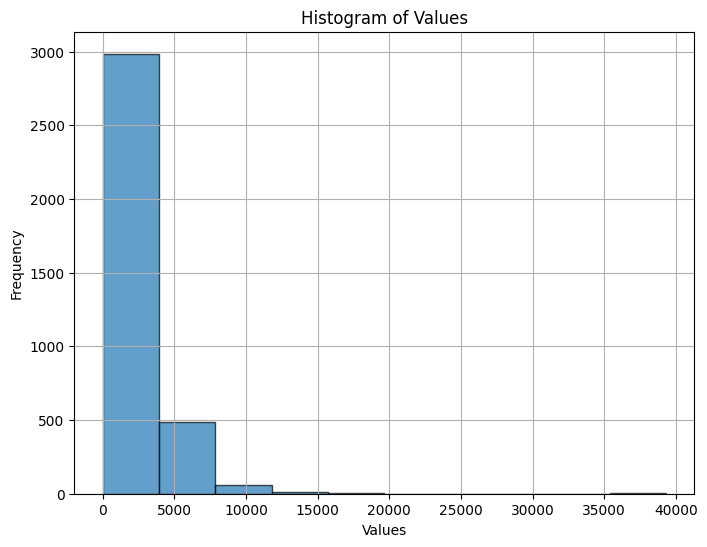

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(pdf_rename['g45_t2e_p'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid(True)
plt.show()

In [183]:
#drop px with missing diagnostic data
df_nooutlier = pdf_rename[pdf_rename['g45_t2e_p'] < 20000]
len(df_nooutlier)

3543

In [184]:
#df_nooutlier is full dataset for analysis; n=3543

In [185]:
depressed_sum = df_nooutlier['dep_yes'].sum()
print('Depressed Cohort Total:', depressed_sum)
total_number_of_rows = len(df_nooutlier)
control_sum = total_number_of_rows-depressed_sum
print('Control Cohort Total:', control_sum)

Depressed Cohort Total: 1251
Control Cohort Total: 2292


In [186]:
median_pretime = df_nooutlier['g45_t2e_p'].median()
print(median_pretime)

1809.0


In [187]:
median_pretime = df_nooutlier['g45_t2e_p'].quantile(0.25)
print(median_pretime)

824.0


In [188]:
median_pretime = df_nooutlier['g45_t2e_p'].quantile(0.75)
print(median_pretime)

3205.5


In [190]:
# check for diagnosed depression; if yes, return 1
def check_for_dep_diag(row):
    if row['f31_time'] > 0 or row['f32_time'] > 0 or row['f33_time'] > 0:
        return 1
    else:
        return 0

df_nooutlier['dep_diag_yes'] = df_nooutlier.apply(check_for_dep_diag, axis=1)
check_dep_diag = df_nooutlier['dep_diag_yes'].sum()
print("Number of px with depression diagnosis (F31, F32, F33):", check_dep_diag)

Number of px with depression diagnosis (F31, F32, F33): 474


/tmp/ipykernel_111/1929880988.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nooutlier['dep_diag_yes'] = df_nooutlier.apply(check_for_dep_diag, axis=1)


In [191]:
# check for self-reported depression; if yes, return 1
def check_for_sr_depression(row):
    if row['dep_diag_yes'] == 0:
        if '1286' in row['sr_illness'] or '1291' in row['sr_illness']:
            return 1
    return 0

df_nooutlier['dep_sr_yes'] = df_nooutlier.apply(lambda row: check_for_sr_depression(row), axis=1)
check_dep_sr = df_nooutlier['dep_sr_yes'].sum()
print("Number of px with self-reported depression that do not have F31-33 diagnoses:", check_dep_sr)

Number of px with self-reported depression that do not have F31-33 diagnoses: 5


/tmp/ipykernel_111/1712754248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nooutlier['dep_sr_yes'] = df_nooutlier.apply(lambda row: check_for_sr_depression(row), axis=1)


In [193]:

# check for self-reported depression; if yes, return 1
def check_for_screen_depression(row):
    if row['dep_diag_yes'] == 0 and row['dep_sr_yes'] == 0:
        if row['phq2_sum'] > 2:
            return 1
    return 0

df_nooutlier['dep_screen_yes'] = df_nooutlier.apply(lambda row: check_for_screen_depression(row), axis=1)
check_dep_screen = df_nooutlier['dep_screen_yes'].sum()
print("Number of px with screened PHQ-2 score >2 who do not self-report or have an F31-33 diagnosis:", check_dep_screen)

Number of px with screened PHQ-2 score >2 who do not self-report or have an F31-33 diagnosis: 772


/tmp/ipykernel_111/2019318095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nooutlier['dep_screen_yes'] = df_nooutlier.apply(lambda row: check_for_screen_depression(row), axis=1)


In [194]:

# check for self-reported depression; if yes, return 1
def check_for_screen_depression(row):
    if row['phq2_sum'] > 2:
            return 1
    return 0

df_nooutlier['dep_screen_yes'] = df_nooutlier.apply(lambda row: check_for_screen_depression(row), axis=1)
check_dep_screen = df_nooutlier['dep_screen_yes'].sum()
print("Number of px with screened PHQ-2 score >2 who do not self-report or have an F31-33 diagnosis:", check_dep_screen)


Number of px with screened PHQ-2 score >2 who do not self-report or have an F31-33 diagnosis: 1050


/tmp/ipykernel_111/2228519320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nooutlier['dep_screen_yes'] = df_nooutlier.apply(lambda row: check_for_screen_depression(row), axis=1)


In [195]:
most_frequent = df_nooutlier['phq2_1'].mode()

print("Most frequent value(s):", most_frequent)

Most frequent value(s): 0    1.0
Name: phq2_1, dtype: float64


In [196]:
most_frequent = df_nooutlier['phq2_2'].mode()

print("Most frequent value(s):", most_frequent)

Most frequent value(s): 0    1.0
Name: phq2_2, dtype: float64


In [197]:
count_1 = df_nooutlier['phq2_1'].eq(1).sum()
total_values = len(df_nooutlier)
percentage_1 = (count_1 / total_values) * 100
print("Percentage of phq22 equal to 1:", percentage_1)

Percentage of phq22 equal to 1: 71.23906294101045


In [198]:
count_1 = df_nooutlier['phq2_2'].eq(1).sum()
total_values = len(df_nooutlier)
percentage_1 = (count_1 / total_values) * 100
print("Percentage of phq12 equal to 1:", percentage_1)

Percentage of phq12 equal to 1: 72.98899237933955


In [199]:
pdf_rename = df_nooutlier

In [215]:
#begin data analysis
# get the median and IQR for depressed cohort
median_age_dep = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'age_i0'].median()
iqr_1_dep = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'age_i0'].quantile(0.25)
iqr_2_dep = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'age_i0'].quantile(0.75)
print('Depressed Age Median:', median_age_dep)
print('Depressed Age IQR:', iqr_1_dep, iqr_2_dep)

# get the median and IQR for control cohort
median_age_cont = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'age_i0'].median()
iqr_1_cont = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'age_i0'].quantile(0.25)
iqr_2_cont = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'age_i0'].quantile(0.75)
print('Control Age Median:', median_age_cont)
print('Control Age IQR:', iqr_1_cont, iqr_2_cont)

#get full dataset age info
median_age_full = pdf_rename['age_i0'].median()
std_age_full = pdf_rename['age_i0'].std()
print("Median Age (full):", median_age_full)
print("STDev Age (full):", std_age_full)

import scipy.stats as stats
# perform the Mann-Whitney U test for age
print('P-value for age:')
stats.mannwhitneyu(x=pdf_rename['age_i0'], y=pdf_rename['dep_yes'], alternative = 'two-sided')

Depressed Age Median: 62.0
Depressed Age IQR: 57.0 66.0
Control Age Median: 64.0
Control Age IQR: 60.0 67.0
Median Age (full): 63.0
STDev Age (full): 5.930258948895708
P-value for age:


MannwhitneyuResult(statistic=12552849.0, pvalue=0.0)

In [216]:
#get male/female data
percent_male_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'male'].mean() * 100
male_sum_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'male'].sum()
print('Depressed Cohort Percent male:', percent_male_d)
print('Depressed Cohort Total male:', male_sum_d)
percent_male_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'male'].mean() * 100
male_sum_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'male'].sum()
print('Control Cohort Percent male:', percent_male_c)
print('Control Cohort Total male:', male_sum_c)
perc_men_total = ((male_sum_d+male_sum_c)/1364)*100
print('% of men in total 1364 cohort', perc_men_total)
from scipy.stats import chi2_contingency
data = pd.crosstab(pdf_rename['male'], pdf_rename['dep_yes']).to_numpy()
# chi-square test for independence for male data
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('MALE - Chi-square test statistic:', chi2_stat)
print('MALE - P-value:', p_val)

Depressed Cohort Percent male: 51.159072741806554
Depressed Cohort Total male: 640
Control Cohort Percent male: 59.59860383944153
Control Cohort Total male: 1366
% of men in total 1364 cohort 147.0674486803519
MALE - Chi-square test statistic: 23.125592642138976
MALE - P-value: 1.5175730231205395e-06


In [217]:
#get white data
percent_white_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'white_yes'].mean() * 100
white_sum_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'white_yes'].sum()
print('Depressed Cohort Percent white:', percent_white_d)
print('Depressed Cohort Total white:', white_sum_d)
percent_white_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'white_yes'].mean() * 100
white_sum_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'white_yes'].sum()
print('Control Cohort Percent white:', percent_white_c)
print('Control Cohort Total white:', white_sum_c)

data = pd.crosstab(pdf_rename['white_yes'], pdf_rename['dep_yes']).to_numpy()
# chi-square test for independence for white
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('WHITE - Chi-square test statistic:', chi2_stat)
print('WHITE - P-value:', p_val)

Depressed Cohort Percent white: 95.04396482813749
Depressed Cohort Total white: 1189
Control Cohort Percent white: 97.33856893542757
Control Cohort Total white: 2231
WHITE - Chi-square test statistic: 12.039811913902332
WHITE - P-value: 0.0005207622598826235


In [218]:
# get  TDI data
median_tdi_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'tdi'].median()
iqr_1_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'tdi'].quantile(0.25)
iqr_2_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'tdi'].quantile(0.75)
print('Depressed TDI Median:', median_tdi_d)
print('Depressed TDI IQR:', iqr_1_d, iqr_2_d)
# get the median and IQR for depressed cohort TDI
median_tdi_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'tdi'].median()
iqr_1_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'tdi'].quantile(0.25)
iqr_2_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'tdi'].quantile(0.75)
print('Control TDI Median:', median_tdi_c)
print('Control TDI IQR:', iqr_1_c, iqr_2_c)
# perform the Mann-Whitney U test
print('P-value for tdi:')
#pdf_rename_tdi = pdf_rename.dropna(subset=['tdi'], inplace=True)
pdf_rename_tdi = pdf_rename.dropna(subset=['tdi']).copy()

Depressed TDI Median: -1.34501
Depressed TDI IQR: -3.233425 1.89694
Control TDI Median: -2.2940199999999997
Control TDI IQR: -3.683835 0.141765
P-value for tdi:


In [219]:
stats.mannwhitneyu(x=pdf_rename_tdi['tdi'], y=pdf_rename_tdi['dep_yes'], alternative = 'two-sided')

MannwhitneyuResult(statistic=3496737.0, pvalue=1.5383747979038802e-235)

In [220]:
merged_df_2 = pdf_rename[~(pdf_rename['alc_freq'] == -3)]
len(merged_df_2)

3540

In [221]:
#reorder alc_freq values 
#if 4	One to three times a month | 5	Special occasions only | 6	Never, then make seldom=1
#if 2	Three or four times a week | 3	Once or twice a week, then make sometimes=2
#if 1	Daily or almost daily, then make daily=3
merged_df_2['alc_freq_filter'] = np.where(merged_df_2['alc_freq'].isin([4, 5, 6]), 1, 
                    np.where(merged_df_2['alc_freq'].isin([2, 3]), 2, 
                             np.where(merged_df_2['alc_freq'].isin([1]), 3, np.nan)))

/tmp/ipykernel_111/1908887074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_2['alc_freq_filter'] = np.where(merged_df_2['alc_freq'].isin([4, 5, 6]), 1,


In [222]:
# get the %s of each category for alcohol frequency 
perc_alc_freq_d = merged_df_2.loc[merged_df_2['dep_yes'] == 1, 'alc_freq_filter'].value_counts(normalize=True)
print('DEPRESSED Percentages of alc freq')
print(perc_alc_freq_d * 100)
perc_alc_freq_c = merged_df_2.loc[merged_df_2['dep_yes'] == 0, 'alc_freq_filter'].value_counts(normalize=True)
# print the value counts as percentages
print('CONTROL Percentages of alc freq')
print(perc_alc_freq_c * 100)

data = pd.crosstab(merged_df_2['alc_freq_filter'], merged_df_2['dep_yes']).to_numpy()
# chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('ALC FREQ - Chi-square test statistic:', chi2_stat)
print('ALC FREQ - P-value:', p_val)

DEPRESSED Percentages of alc freq
1.0    44.08
2.0    36.80
3.0    19.12
Name: alc_freq_filter, dtype: float64
CONTROL Percentages of alc freq
2.0    44.779380
1.0    31.760594
3.0    23.460026
Name: alc_freq_filter, dtype: float64
ALC FREQ - Chi-square test statistic: 53.19145212752525
ALC FREQ - P-value: 2.8159369613638715e-12


In [223]:
#for smoking status, drop anyone who answered "-3/prefer not to answer"
merged_df_2['smok_stat'] = merged_df_2['smok_stat'].astype(str)
merged_df_2 = merged_df_2[~merged_df_2['smok_stat'].str.contains('-3')]
merged_df_2 = merged_df_2[~merged_df_2['smok_stat'].str.contains('nan')]
len(merged_df_2)

/tmp/ipykernel_111/1671262805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_2['smok_stat'] = merged_df_2['smok_stat'].astype(str)


3517

In [224]:
# get the smoking status data
perc_smok_stat_d = merged_df_2.loc[merged_df_2['dep_yes'] == 1, 'smok_stat'].value_counts(normalize=True)
print('DEPRESSED Percentages of smok stat')
print(perc_smok_stat_d * 100)
perc_smok_stat_c = merged_df_2.loc[merged_df_2['dep_yes'] == 0, 'smok_stat'].value_counts(normalize=True)
print('CONTROL Percentages of smok stat')
print(perc_smok_stat_c * 100)

data = pd.crosstab(merged_df_2['smok_stat'], merged_df_2['dep_yes']).to_numpy()
# chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('SMOK FRQ - Chi-square test statistic:', chi2_stat)
print('SMOK FREQ -  P-value:', p_val)

DEPRESSED Percentages of smok stat
1.0    41.559486
0.0    41.237942
2.0    17.202572
Name: smok_stat, dtype: float64
CONTROL Percentages of smok stat
0.0    47.514298
1.0    43.246810
2.0     9.238891
Name: smok_stat, dtype: float64
SMOK FRQ - Chi-square test statistic: 49.82326276715028
SMOK FREQ -  P-value: 1.5171061011625913e-11


In [225]:
# get BMI data
median_bmi_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'bmi'].median()
iqr_1_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'bmi'].quantile(0.25)
iqr_2_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'bmi'].quantile(0.75)
print('Depressed BMI Median:', median_bmi_d)
print('Depressed BMI IQR:', iqr_1_d, iqr_2_d)
# get the median and IQR for depressed cohort BMI
median_bmi_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'bmi'].median()
iqr_1_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'bmi'].quantile(0.25)
iqr_2_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'bmi'].quantile(0.75)
print('Control BMI Median:', median_bmi_c)
print('Control BMI IQR:', iqr_1_c, iqr_2_c)
# use the Mann-Whitney U test
print('P-value for BMI:')
pdf_rename_bmi = pdf_rename.dropna(subset=['bmi']).copy()
stats.mannwhitneyu(x=pdf_rename_bmi['bmi'], y=pdf_rename_bmi['dep_yes'], alternative = 'two-sided')

Depressed BMI Median: 28.4384
Depressed BMI IQR: 25.57575 32.093
Control BMI Median: 27.7381
Control BMI IQR: 25.0595 30.9304
P-value for BMI:


MannwhitneyuResult(statistic=12362256.0, pvalue=0.0)

In [226]:
# get pulse pressure data
median_pp_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'pp'].median()
iqr_1_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'pp'].quantile(0.25)
iqr_2_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'pp'].quantile(0.75)
print('Depressed PP Median:', median_pp_d)
print('Depressed PP IQR:', iqr_1_d, iqr_2_d)
median_pp_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'pp'].median()
iqr_1_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'pp'].quantile(0.25)
iqr_2_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'pp'].quantile(0.75)
print('Control PP Median:', median_pp_c)
print('Control PP IQR:', iqr_1_c, iqr_2_c)
# Mann-Whitney U test
print('P-value for PP:')
pdf_rename_pp = pdf_rename.dropna(subset=['pp']).copy()
stats.mannwhitneyu(x=pdf_rename_pp['pp'], y=pdf_rename_pp['dep_yes'], alternative = 'two-sided')

Depressed PP Median: 58.0
Depressed PP IQR: 48.0 69.0
Control PP Median: 59.5
Control PP IQR: 50.0 71.0
P-value for PP:


MannwhitneyuResult(statistic=12552849.0, pvalue=0.0)

In [227]:
# check for htn; if yes, return 1
def check_htn_criteria(row):
    if row['i10_time'] > 0 or row['i15_time'] > 0 or row['sys_bp'] > 140 or row['dias_bp'] > 90 or '1065' in row['sr_illness'] or '1072' in row['sr_illness']:
        return 1
    else:
        return 0

pdf_rename['htn_yes'] = pdf_rename.apply(check_htn_criteria, axis=1)
# get the %s of each category in htn_yes
perc_htn_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'htn_yes'].value_counts(normalize=True)
# print the value counts as percentages
print('DEPRESSED Percentages of htn')
print(perc_htn_d * 100)
# get the %s of each category in htn_yes 
perc_htn_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'htn_yes'].value_counts(normalize=True)
# print the value counts as percentages
print('Control Percentages of htn')
print(perc_htn_c * 100)

data = pd.crosstab(pdf_rename['htn_yes'], pdf_rename['dep_yes']).to_numpy()
# chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('htn Chi-square test statistic:', chi2_stat)
print('htn  P-value:', p_val)

DEPRESSED Percentages of htn
1    77.93765
0    22.06235
Name: htn_yes, dtype: float64
Control Percentages of htn
1    75.95986
0    24.04014
Name: htn_yes, dtype: float64
htn Chi-square test statistic: 1.6603579999161746
htn  P-value: 0.19755499436518087


/tmp/ipykernel_111/3757033138.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['htn_yes'] = pdf_rename.apply(check_htn_criteria, axis=1)


In [228]:
pdf_rename['e78_date'] = pd.to_datetime(pdf_rename['e78_date']).dt.date  # Convert to datetime.date
pdf_rename['date_i0'] = pd.to_datetime(pdf_rename['date_i0']).dt.date  # Convert to datetime.date

/tmp/ipykernel_111/1438442210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['e78_date'] = pd.to_datetime(pdf_rename['e78_date']).dt.date  # Convert to datetime.date
/tmp/ipykernel_111/1438442210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['date_i0'] = pd.to_datetime(pdf_rename['date_i0']).dt.date  # Convert to datetime.date


In [229]:
#create hyperlipidemia category
#prep hchol cases
pdf_rename['e78_time'] = (pdf_rename['date_i0'] - pdf_rename['e78_date']).dt.days
def check_hchol_criteria(row):
    if row['e78_time'] > 0 or '1473' in row['sr_illness']:
        return 1
    else:
        return 0
    
pdf_rename['hchol_yes'] = pdf_rename.apply(check_hchol_criteria, axis=1)
perc_hchol_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'hchol_yes'].value_counts(normalize=True)
print('DEPRESSED Percentages of hchol')
print(perc_hchol_d * 100)
perc_hchol_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'hchol_yes'].value_counts(normalize=True)
print('Control Percentages of hchol')
print(perc_hchol_c * 100)

data = pd.crosstab(pdf_rename['hchol_yes'], pdf_rename['dep_yes']).to_numpy()
# chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('hchol Chi-square test statistic:', chi2_stat)
print('hchol  P-value:', p_val)

DEPRESSED Percentages of hchol
1    53.317346
0    46.682654
Name: hchol_yes, dtype: float64
Control Percentages of hchol
1    51.00349
0    48.99651
Name: hchol_yes, dtype: float64
hchol Chi-square test statistic: 1.6439995129422593
hchol  P-value: 0.19977760111790288


/tmp/ipykernel_111/2497235162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['e78_time'] = (pdf_rename['date_i0'] - pdf_rename['e78_date']).dt.days
/tmp/ipykernel_111/2497235162.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['hchol_yes'] = pdf_rename.apply(check_hchol_criteria, axis=1)


In [230]:
#create diabetes category
#prep diabetes cases
pdf_rename['e10_time'] = (pdf_rename['date_i0'] - pdf_rename['e10_date']).dt.days
pdf_rename['e11_time'] = (pdf_rename['date_i0'] - pdf_rename['e11_date']).dt.days

def check_diab_criteria(row):
    if row['e10_time'] > 0 or row['e11_time'] > 0 or '1222' in row['sr_illness'] or '1223' in row['sr_illness']:
        return 1
    else:
        return 0

pdf_rename['diab_yes'] = pdf_rename.apply(check_diab_criteria, axis=1)
perc_diab_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'diab_yes'].value_counts(normalize=True)
print('DEPRESSED Percentages of diabetic')
print(perc_diab_d * 100)
perc_diab_c = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'diab_yes'].value_counts(normalize=True)
print('CONTROL Percentages of diabetic')
print(perc_diab_c * 100)

data = pd.crosstab(pdf_rename['diab_yes'], pdf_rename['dep_yes']).to_numpy()
# chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('diabetes Chi-square test statistic:', chi2_stat)
print('diabetes  P-value:', p_val)

DEPRESSED Percentages of diabetic
0    88.649081
1    11.350919
Name: diab_yes, dtype: float64
CONTROL Percentages of diabetic
0    93.019197
1     6.980803
Name: diab_yes, dtype: float64
diabetes Chi-square test statistic: 19.26529735023505
diabetes  P-value: 1.1375525299729147e-05


/tmp/ipykernel_111/901177947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['e10_time'] = (pdf_rename['date_i0'] - pdf_rename['e10_date']).dt.days
/tmp/ipykernel_111/901177947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['e11_time'] = (pdf_rename['date_i0'] - pdf_rename['e11_date']).dt.days
/tmp/ipykernel_111/901177947.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [231]:
#RX for depression
pdf_rename['rx'] = pdf_rename['rx'].astype(str)
def check_substrings(df):
    for index, row in df.iterrows():
        if '1140879616' in row['rx'] or '1140921600' in row['rx'] or '1140879540' in row['rx'] or '1140867878' in row['rx'] or '1140916282' in row['rx'] or '1140909806' in row['rx'] or '1140867888' in row['rx'] or '1141152732' in row['rx'] or '1141180212' in row['rx'] or '1140879634' in row['rx'] or '1140867876' in row['rx'] or '1140882236' in row['rx'] or '1141190158' in row['rx'] or '1141200564' in row['rx'] or '1140867726' in row['rx'] or '1140879620' in row['rx'] or '1140867818' in row['rx'] or '1140879630' in row['rx'] or '1140879628' in row['rx'] or '1141151946' in row['rx'] or '1140867948' in row['rx'] or '1140867624' in row['rx'] or '1140867756' in row['rx'] or '1140867884' in row['rx'] or '1141151978' in row['rx'] or '1141152736' in row['rx'] or '1141201834' in row['rx'] or '1140867690' in row['rx'] or '1140867640' in row['rx'] or '1140867920' in row['rx'] or '1140867850' in row['rx'] or '1140879544' in row['rx'] or '1141200570' in row['rx'] or '1140867934' in row['rx'] or '1140867758' in row['rx'] or '1140867914' in row['rx'] or '1140867820' in row['rx'] or '1141151982' in row['rx'] or '1140882244' in row['rx'] or '1140879556' in row['rx'] or '1140867852' in row['rx'] or '1140867860' in row['rx'] or '1140917460' in row['rx'] or '1140867938' in row['rx'] or '1140867856' in row['rx'] or '1140867922' in row['rx'] or '1140910820' in row['rx'] or '1140882312' in row['rx'] or '1140867944' in row['rx'] or '1140867784' in row['rx'] or '1140867812' in row['rx'] or '1140867668' in row['rx']:
            df.at[index, 'rx_dep_yes'] = 1
        else:
            df.at[index, 'rx_dep_yes'] = 0
    return df     
       
pdf_rename = check_substrings(pdf_rename)

perc_dep_rx_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'rx_dep_yes'].value_counts(normalize=True)
print('DEPRESSED Percentages on Depression Rx')
print(perc_dep_rx_d * 100)
perc_dep_rx_no = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'rx_dep_yes'].value_counts(normalize=True)
print('CONTROL Percentages on Depression Rx')
print(perc_dep_rx_no * 100)

data = pd.crosstab(pdf_rename['rx_dep_yes'], pdf_rename['dep_yes']).to_numpy()
# chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('Dep Rx Chi-square test statistic:', chi2_stat)
print('Dep Rx  P-value:', p_val)

/tmp/ipykernel_111/1620261707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['rx'] = pdf_rename['rx'].astype(str)
/tmp/ipykernel_111/1620261707.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, 'rx_dep_yes'] = 0


DEPRESSED Percentages on Depression Rx
0.0    72.342126
1.0    27.657874
Name: rx_dep_yes, dtype: float64
CONTROL Percentages on Depression Rx
0.0    95.636998
1.0     4.363002
Name: rx_dep_yes, dtype: float64
Dep Rx Chi-square test statistic: 396.9912370534553
Dep Rx  P-value: 2.488345227135064e-88


In [232]:
#RX for beta blockers
pdf_rename['rx'] = pdf_rename['rx'].astype(str)
def check_substrings(df):
    for index, row in df.iterrows():
        if '1140866738' in row['rx'] or '1140879760' in row['rx'] or '1140879818' in row['rx'] or '1140909368' in row['rx'] or '1140879842' in row['rx'] or '1140866804' in row['rx'] or '1140866764' in row['rx'] or '1140866766' in row['rx'] or '1140879854' in row['rx'] or '1141164276' in row['rx'] or '1141169516' in row['rx'] or '1141194810' in row['rx'] or '1141184722' in row['rx'] or '1140879758' in row['rx'] or '1141146126' in row['rx'] or '1140860192' in row['rx'] or '1140910614' in row['rx'] or '1140875840' in row['rx'] or '1140884298' in row['rx'] or '1140860292' in row['rx'] or '1141180778' in row['rx'] or '1140860426' in row['rx'] or '1141146124' in row['rx'] or '1141146128' in row['rx'] or '1141194804' in row['rx'] or '1141194808' in row['rx'] or '1140864950' in row['rx'] or '1140879762' in row['rx'] or '1140879824' in row['rx'] or '1140879830' in row['rx'] or '1140866724' in row['rx'] or '1140860418' in row['rx'] or '1140860332' in row['rx'] or '1140860404' in row['rx'] or '1140916342' in row['rx'] or '1140866756' in row['rx'] or '1140851556' in row['rx'] or '1140879826' in row['rx'] or '1140860332' in row['rx'] or '1140860418' in row['rx'] or '1140879822' in row['rx'] or '1140860308' in row['rx'] or '1140866802' in row['rx'] or '1140866782' in row['rx'] or '1140860336' in row['rx'] or '1140866712' in row['rx']:
            df.at[index, 'rx_bb_yes'] = 1
        else:
            df.at[index, 'rx_bb_yes'] = 0
    return df     
       
pdf_rename = check_substrings(pdf_rename)

perc_bb_rx_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'rx_bb_yes'].value_counts(normalize=True)
print('DEPRESSED Percentages on Beta Blocker Rx')
print(perc_bb_rx_d * 100)
perc_bb_rx_no = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'rx_bb_yes'].value_counts(normalize=True)
print('CONTROL Percentages on Beta Blocker Rx')
print(perc_bb_rx_no * 100)
 
data = pd.crosstab(pdf_rename['rx_bb_yes'], pdf_rename['dep_yes']).to_numpy()
# chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(data)
print('BB Rx Chi-square test statistic:', chi2_stat)
print('BB Rx  P-value:', p_val)

/tmp/ipykernel_111/2303910870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['rx'] = pdf_rename['rx'].astype(str)
/tmp/ipykernel_111/2303910870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, 'rx_bb_yes'] = 1


DEPRESSED Percentages on Beta Blocker Rx
0.0    81.454836
1.0    18.545164
Name: rx_bb_yes, dtype: float64
CONTROL Percentages on Beta Blocker Rx
0.0    80.191972
1.0    19.808028
Name: rx_bb_yes, dtype: float64
BB Rx Chi-square test statistic: 0.7477446724884687
BB Rx  P-value: 0.38719122154137264


In [233]:
# if there is a dep diagnosis, return the time of diagnosis in the dep_dur column
def get_dep_cases(row, cols):
    for col in cols:
        if row[col] > 0:
            return row[col]
    return None

cols_to_check = ['f31_time', 'f32_time', 'f33_time']
pdf_rename['dep_dur'] = pdf_rename.apply(lambda row: get_dep_cases(row, cols_to_check), axis=1)
len(pdf_rename)

/tmp/ipykernel_111/3205030750.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['dep_dur'] = pdf_rename.apply(lambda row: get_dep_cases(row, cols_to_check), axis=1)


3543

In [234]:
#START AGE AT DIAGNOSIS ANALYSIS COX MODEL
# Divide by 365 only if value is not missing
pdf_rename.loc[pdf_rename['dep_dur'].notna(), 'dep_dur_yrs'] = pdf_rename.loc[pdf_rename['dep_dur'].notna(), 'dep_dur']
pdf_rename.loc[pdf_rename['dep_dur_yrs'].notna(), 'dep_dur_yrs'] = round(pdf_rename.loc[pdf_rename['dep_dur_yrs'].notna(), 'dep_dur_yrs'] / 365, 1)
print('this works')

this works


/tmp/ipykernel_111/2457977204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename.loc[pdf_rename['dep_dur'].notna(), 'dep_dur_yrs'] = pdf_rename.loc[pdf_rename['dep_dur'].notna(), 'dep_dur']


In [235]:
# get BMI data
median_bmi_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'dep_dur_yrs'].median()
iqr_1_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'dep_dur_yrs'].quantile(0.25)
iqr_2_d = pdf_rename.loc[pdf_rename['dep_yes'] == 1, 'dep_dur_yrs'].quantile(0.75)
print('Depressed BMI Median:', median_bmi_d)
print('Depressed BMI IQR:', iqr_1_d, iqr_2_d)
# get the median and IQR for depressed cohort BMI
median_bmi_d = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'dep_dur_yrs'].median()
iqr_1_d = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'dep_dur_yrs'].quantile(0.25)
iqr_2_d = pdf_rename.loc[pdf_rename['dep_yes'] == 0, 'dep_dur_yrs'].quantile(0.75)
print('Depressed BMI Median:', median_bmi_d)
print('Depressed BMI IQR:', iqr_1_d, iqr_2_d)
# use the Mann-Whitney U test
print('P-value for BMI:')
pdf_rename_bmi = pdf_rename.dropna(subset=['dep_dur_yrs']).copy()
stats.mannwhitneyu(x=pdf_rename_bmi['dep_dur_yrs'], y=pdf_rename_bmi['dep_yes'], alternative = 'two-sided')

Depressed BMI Median: 8.95
Depressed BMI IQR: 4.0 19.975
Depressed BMI Median: nan
Depressed BMI IQR: nan nan
P-value for BMI:


MannwhitneyuResult(statistic=208086.0, pvalue=1.7287671413374247e-130)

In [236]:
#this is where you create a dataset for cox models

In [237]:
#FOR UNIMPUTED ANALYSIS - SENSITIVITY
cevd_df_first.to_csv('cevd_unimputed.csv')

In [238]:
#Find covariates with missing values
covariates_missingdata = pdf_rename.columns[pdf_rename.isnull().any()]
#Check that only tdi and bmi have missing values
print(covariates_missingdata)

Index(['tdi', 'bmi', 'alc_freq', 'i21_date', 'i10_date', 'i15_date',
       'e78_date', 'e10_date', 'e11_date', 'asi',
       ...
       'i67_event_p', 'i68_event_p', 'i69_event_p', 'cevd_t2e', 'i10_time',
       'i15_time', 'e78_time', 'e10_time', 'e11_time', 'dep_dur_yrs'],
      dtype='object', length=117)


In [240]:
#USE MUTIPLE CHAIN IMPUTATION FOR MISSING TDI AND BMI DATA
# Cleaning the data :
from fancyimpute import IterativeImputer
# define the column(s) that you want to impute
cols_to_impute = ['tdi', 'bmi']
# create an instance of the IterativeImputer class with MICE algorithm
imputer = IterativeImputer(max_iter=10, sample_posterior=True)
# impute the selected columns using multiple chains
pdf_rename[cols_to_impute] = imputer.fit_transform(pdf_rename[cols_to_impute])

/tmp/ipykernel_111/264798684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename[cols_to_impute] = imputer.fit_transform(pdf_rename[cols_to_impute])


In [245]:
len(pdf_rename)

3543

In [246]:
pdf_rename.to_csv('printtia.csv')

In [247]:
pdf_rename['phq2_1_1'] = pdf_rename['phq2_1_1'].replace(-1, 0)
pdf_rename['phq2_2_1'] = pdf_rename['phq2_2_1'].replace(-1, 0)
pdf_rename['phq2_sum_1'] = pdf_rename['phq2_1_1']+pdf_rename['phq2_2_1']
pdf_rename['phq2_diff'] = pdf_rename['phq2_sum_1']-pdf_rename['phq2_sum']
#pdf_rename = pdf_rename.drop(pdf_rename.loc[pdf_rename['phq2_1_1'] < -1].index)
#pdf_rename = pdf_rename.drop(pdf_rename.loc[pdf_rename['phq2_2_1'] < -1].index)
pdf_rename['phq2_q1_diff'] = pdf_rename['phq2_1_1']-pdf_rename['phq2_1']
len(pdf_rename)

/tmp/ipykernel_111/1466106906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['phq2_1_1'] = pdf_rename['phq2_1_1'].replace(-1, 0)
/tmp/ipykernel_111/1466106906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_rename['phq2_2_1'] = pdf_rename['phq2_2_1'].replace(-1, 0)
/tmp/ipykernel_111/1466106906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

3543

In [248]:
#pdf_rename.dropna(subset=['phq2_q1_diff'], inplace=True)
#len(pdf_rename)

In [249]:
cevd_df_first = pdf_rename

In [250]:
prior_f01 = cevd_df_first[cevd_df_first['f01_event_p']==1]
print('previous f01:', len(prior_f01))
prior_g45 = cevd_df_first[cevd_df_first['g45_event_p']==1]
print('previous g45:', len(prior_g45))
prior_g46 = cevd_df_first[cevd_df_first['g46_event_p']==1]
print('previous g46:', len(prior_g46))
prior_h34 = cevd_df_first[cevd_df_first['h34_event_p']==1]
print('previous h34:', len(prior_h34))
prior_i60 = cevd_df_first[cevd_df_first['i60_event_p']==1]
print('previous i60:', len(prior_i60))
prior_i61 = cevd_df_first[cevd_df_first['i61_event_p']==1]
print('previous i61:', len(prior_i61))
prior_i62 = cevd_df_first[cevd_df_first['i62_event_p']==1]
print('previous i62:', len(prior_i62))
prior_i63 = cevd_df_first[cevd_df_first['i63_event_p']==1]
print('previous i63:', len(prior_i63))
prior_i64 = cevd_df_first[cevd_df_first['i64_event_p']==1]
print('previous i64:', len(prior_i64))
prior_i65 = cevd_df_first[cevd_df_first['i65_event_p']==1]
print('previous i65:', len(prior_i65))
prior_i66 = cevd_df_first[cevd_df_first['i66_event_p']==1]
print('previous i66:', len(prior_i66))
prior_i67 = cevd_df_first[cevd_df_first['i67_event_p']==1]
print('previous i67:', len(prior_i67))
prior_i68 = cevd_df_first[cevd_df_first['i68_event_p']==1]
print('previous i68:', len(prior_i68))
prior_i69 = cevd_df_first[cevd_df_first['i69_event_p']==1]
print('previous i69:', len(prior_i69))

previous f01: 1
previous g45: 3543
previous g46: 9
previous h34: 33
previous i60: 33
previous i61: 20
previous i62: 7
previous i63: 203
previous i64: 1167
previous i65: 134
previous i66: 2
previous i67: 173
previous i68: 0
previous i69: 61


In [251]:
depressed_sum = cevd_df_first['dep_yes'].sum()
print('Depressed Cohort Total:', depressed_sum)
total_number_of_rows = len(cevd_df_first)
control_sum = total_number_of_rows-depressed_sum
print('Control Cohort Total:', control_sum)

Depressed Cohort Total: 1251
Control Cohort Total: 2292


In [253]:
#if there is a time-to-event in XXX_t2e, then place 1 in outcome column for each CeVD
cevd_df_first.loc[cevd_df_first['f01_t2e'].notna(), 'f01_event'] = 1
cevd_df_first.loc[cevd_df_first['g45_t2e'].notna(), 'g45_event'] = 1
cevd_df_first.loc[cevd_df_first['g46_t2e'].notna(), 'g46_event'] = 1
cevd_df_first.loc[cevd_df_first['h34_t2e'].notna(), 'h34_event'] = 1
cevd_df_first.loc[cevd_df_first['i60_t2e'].notna(), 'i60_event'] = 1
cevd_df_first.loc[cevd_df_first['i61_t2e'].notna(), 'i61_event'] = 1
cevd_df_first.loc[cevd_df_first['i62_t2e'].notna(), 'i62_event'] = 1
cevd_df_first.loc[cevd_df_first['i63_t2e'].notna(), 'i63_event'] = 1
cevd_df_first.loc[cevd_df_first['i64_t2e'].notna(), 'i64_event'] = 1
cevd_df_first.loc[cevd_df_first['i65_t2e'].notna(), 'i65_event'] = 1
cevd_df_first.loc[cevd_df_first['i66_t2e'].notna(), 'i66_event'] = 1
cevd_df_first.loc[cevd_df_first['i67_t2e'].notna(), 'i67_event'] = 1
cevd_df_first.loc[cevd_df_first['i68_t2e'].notna(), 'i68_event'] = 1
cevd_df_first.loc[cevd_df_first['i69_t2e'].notna(), 'i69_event'] = 1

In [255]:
#drop rows without an initial cevd event. unlike CRR file, this version doesn't have deaths
def drop_rows_with_empty_cevdt2e(df):
    df.dropna(subset=['cevd_t2e'], inplace=True)
    return df

cevd_df_first = drop_rows_with_empty_cevdt2e(cevd_df_first)
#FOR LR (IMPUTED)
cevd_df_first.to_csv('cevd_lr.csv', index=False)

/tmp/ipykernel_111/3276398401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['cevd_t2e'], inplace=True)


In [256]:
#

In [257]:
####MAIN COX MODEL

In [258]:
#

In [259]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index as cindex

In [260]:
#for all cevd types

In [261]:
len(cevd_df_first)

562

In [262]:
def update_comp_columns(dataframe):
    dataframe_new = dataframe.copy()
    
    for index, row in dataframe.iterrows():
        if not pd.isna(row['i60_t2e']) or not pd.isna(row['i61_t2e']) or not pd.isna(row['i62_t2e']) or not pd.isna(row['i63_t2e']) or not pd.isna(row['i64_t2e']):
            dataframe_new.at[index, 'stroke_event'] = 1
            if not pd.isna(row['i60_t2e']):
                dataframe_new.at[index, 'stroke_t2e'] = row['i60_t2e']
            elif not pd.isna(row['i61_t2e']):
                dataframe_new.at[index, 'stroke_t2e'] = row['i61_t2e']
            elif not pd.isna(row['i62_t2e']):
                dataframe_new.at[index, 'stroke_t2e'] = row['i62_t2e']
            elif not pd.isna(row['i63_t2e']):
                dataframe_new.at[index, 'stroke_t2e'] = row['i63_t2e']
            else:
                dataframe_new.at[index, 'stroke_t2e'] = row['i64_t2e'] 


    return dataframe_new

updated_df = update_comp_columns(cevd_df_first)
len(updated_df)

562

In [263]:
updated_df['cevd_t2e'].dtype

Int64Dtype()

In [264]:
cevd_df_first = updated_df

In [265]:
cevd_df_first['i67_t2e'] = pd.to_numeric(cevd_df_first['i67_t2e'], errors='coerce')
cevd_df_first['alc_freq_filter'] = pd.to_numeric(cevd_df_first['alc_freq_filter'], errors='coerce')
cevd_df_first['smok_stat_filter'] = pd.to_numeric(cevd_df_first['smok_stat_filter'], errors='coerce')


In [268]:
#cox model for CEVD - fully adjusted
fulladjust_allcevd = cevd_df_first.dropna(subset=['cevd_t2e'])
len(fulladjust_allcevd)

562

In [269]:
len(fulladjust_allcevd[fulladjust_allcevd['dep_yes']==0])

328

In [270]:
fulladjust_allcevd = fulladjust_allcevd.loc[:, ['cevd_event', 'cevd_t2e', 'age_i0', 'male',  'bmi',   'pp', 'dep_yes']]
fulladjust_allcevd = fulladjust_allcevd[['cevd_event', 'cevd_t2e', 'age_i0', 'male',  'bmi',  'pp', 'dep_yes']]
#fulladjust_allcevd_data = pd.get_dummies(fulladjust_allcevd, columns=['alc_freq', 'smok_stat'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_allcevd, duration_col='cevd_t2e', event_col='cevd_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.015733,0.984390,0.008077,-0.031564,0.000098,0.968929,1.000098,0.000000,-1.947874,0.05143,4.281246
male,0.103835,1.109418,0.087094,-0.066865,0.274536,0.935321,1.315920,0.000000,1.192227,0.23317,2.100531
bmi,0.000525,1.000526,0.008534,-0.016202,0.017253,0.983929,1.017402,0.000000,0.061566,0.95091,0.072622
pp,0.005428,1.005443,0.002576,0.000380,0.010476,1.000380,1.010531,0.000000,2.107632,0.03506,4.833913
dep_yes,0.204438,1.226835,0.090992,0.026096,0.382780,1.026440,1.466355,0.000000,2.246762,0.02466,5.341962


In [271]:
#cox model for CEVD - fully adjusted
fulladjust_allcevd = cevd_df_first.dropna(subset=['stroke_t2e', 'pp'])
len(fulladjust_allcevd)

213

In [272]:
fulladjust_allcevd = fulladjust_allcevd.loc[:, ['stroke_event', 'stroke_t2e', 'age_i0', 'male',  'bmi', 'pp',  'dep_yes']]
fulladjust_allcevd = fulladjust_allcevd[['stroke_event', 'stroke_t2e', 'age_i0', 'male',  'bmi', 'pp', 'dep_yes']]
#fulladjust_allcevd_data = pd.get_dummies(fulladjust_allcevd, columns=['alc_freq', 'smok_stat'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_allcevd, duration_col='stroke_t2e', event_col='stroke_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.026043,0.974293,0.014388,-0.054244,0.002158,0.947201,1.002160,0.000000,-1.810001,0.07030,3.830420
male,-0.188743,0.827999,0.144053,-0.471082,0.093596,0.624326,1.098115,0.000000,-1.310234,0.19012,2.395044
bmi,-0.004341,0.995669,0.012738,-0.029306,0.020625,0.971119,1.020839,0.000000,-0.340780,0.73327,0.447585
pp,0.006918,1.006942,0.004428,-0.001762,0.015597,0.998240,1.015719,0.000000,1.562137,0.11826,3.080020
dep_yes,0.204563,1.226989,0.149981,-0.089395,0.498521,0.914484,1.646284,0.000000,1.363924,0.17259,2.534566


In [273]:
#no combined risk for stroke; only for hemorrhage

In [274]:
print('Schoenfeld residuals results for ALL CEVD:')
schoenfeld_results = cph.check_assumptions(fulladjust_allcevd, p_value_threshold=0.05)

Schoenfeld residuals results for ALL CEVD:
Proportional hazard assumption looks okay.


In [275]:
#cox model for CEVD - age- and sex-adjusted
asadjust_allcevd = cevd_df_first.dropna(subset=['cevd_t2e'])
asadjust_allcevd = asadjust_allcevd[['cevd_event', 'cevd_t2e', 'age_i0', 'male', 'dep_diag_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_allcevd, duration_col='cevd_t2e', event_col='cevd_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.014033,0.986065,0.007676,-0.029077,0.001011,0.971341,1.001012,0.000000,-1.828208,0.06752,3.888576
male,0.090514,1.094737,0.086701,-0.079416,0.260444,0.923656,1.297506,0.000000,1.043986,0.29649,1.753936
dep_diag_yes,0.123186,1.131095,0.112343,-0.097001,0.343373,0.907555,1.409695,0.000000,1.096521,0.27285,1.873817


In [276]:
#cox model for CEVD - unadjusted
unadjust_allcevd = cevd_df_first.dropna(subset=['cevd_t2e'])
unadjust_allcevd = unadjust_allcevd[['cevd_event', 'cevd_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_allcevd, duration_col='cevd_t2e', event_col='cevd_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,0.189122,1.208188,0.085970,0.020624,0.357620,1.020838,1.429922,0.000000,2.199858,0.02782,5.167890


In [277]:
def count_cevd(df):
    dep_count = 0
    cont_count = 0
    for index, row in df.iterrows():
        if row['dep_yes'] == 1:
            dep_count += 1
        if row['dep_yes'] == 0:
            cont_count += 1
    return dep_count, cont_count

cevd_dep_yes = count_cevd(fulladjust_allcevd)
print('Number of depressed CeVD events, Number of control CeVD events:', cevd_dep_yes)

Number of depressed CeVD events, Number of control CeVD events: (82, 131)


In [278]:
#for all f01 types

In [279]:
#cox model for f01 - fully adjusted
fulladjust_f01 = cevd_df_first.dropna(subset=['f01_t2e'])
def count_cevd(df):
    dep_count = 0
    cont_count = 0
    for index, row in df.iterrows():
        if row['dep_yes'] == 1:
            dep_count += 1
        if row['dep_yes'] == 0:
            cont_count += 1
    return dep_count, cont_count

cevd_dep_yes = count_cevd(fulladjust_f01)
print('Number of depressed CeVD events, Number of control CeVD events:', cevd_dep_yes)

Number of depressed CeVD events, Number of control CeVD events: (16, 13)


In [280]:
#cox model for f01 - fully adjusted
fulladjust_f01 = cevd_df_first.dropna(subset=['f01_t2e'])
fulladjust_f01 = fulladjust_f01.loc[:, ['f01_event', 'f01_t2e', 'age_i0', 'male',  'bmi', 'pp', 'dep_yes']]
fulladjust_f01 = fulladjust_f01[['f01_event', 'f01_t2e', 'age_i0', 'male',  'bmi', 'pp','dep_yes']]
#fulladjust_f01_date = pd.get_dummies(fulladjust_f01, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_f01, duration_col='f01_t2e', event_col='f01_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.047130,0.953963,0.098744,-0.240665,0.146405,0.786105,1.157665,0.000000,-0.477292,0.63315,0.659372
male,1.326333,3.767205,0.824123,-0.288918,2.941584,0.749074,18.945842,0.000000,1.609388,0.10753,3.217169
bmi,0.028359,1.028765,0.073907,-0.116496,0.173213,0.890033,1.189120,0.000000,0.383707,0.70120,0.512112
pp,-0.012777,0.987304,0.011368,-0.035058,0.009504,0.965549,1.009549,0.000000,-1.123930,0.26104,1.937642
dep_yes,0.684208,1.982202,0.470885,-0.238710,1.607126,0.787644,4.988455,0.000000,1.453026,0.14622,2.773821


In [281]:
print('Schoenfeld residuals results for F01:')
schoenfeld_results_f01 = cph.check_assumptions(fulladjust_f01, p_value_threshold=0.05)

Schoenfeld residuals results for F01:
The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 29 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
              test_statistic    p  -log2(p)
age_i0  km              2.44 0.12      3.08
        rank            2.44 0.12      3.08
bmi     km              4.40 0.04      4.80
        rank            4.40 0.04      4.80
dep_yes km              2.16 0.14      2.82
        rank            2.16 0.14      2.82
male    km              1.90 0.17      2.58
        rank            1.90 0.17      2.58
pp      km              0.33 0.56      0.83
        rank            0.33 0.56      0.83



1. Variable 'bmi' failed the non-proportional test: p-value is 0.0359.

   Advice 1: the functional form of the variable 'bmi' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'bmi' using pd.cut, and then specify it in `strata=['bmi',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varyi

In [282]:
#cox model for f01 - age- and sex-adjusted
asadjust_f01 = cevd_df_first.dropna(subset=['f01_t2e'])
asadjust_f01 = asadjust_f01.loc[:, ['f01_event', 'f01_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_f01 = asadjust_f01[['f01_event', 'f01_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_f01, duration_col='f01_t2e', event_col='f01_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.024283,0.976009,0.082168,-0.185330,0.136764,0.830830,1.146557,0.000000,-0.295528,0.76759,0.381592
male,1.292184,3.640728,0.617245,0.082406,2.501961,1.085897,12.206409,0.000000,2.093470,0.03631,4.783601
dep_yes,0.647367,1.910504,0.451689,-0.237926,1.532660,0.788261,4.630480,0.000000,1.433216,0.15180,2.719792


In [283]:
#cox model for f01 - unadjusted
unadjust_f01 = cevd_df_first.dropna(subset=['f01_t2e'])
unadjust_f01 = unadjust_f01.loc[:, ['f01_event', 'f01_t2e', 'dep_yes']]
unadjust_f01 = unadjust_f01[['f01_event', 'f01_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_f01, duration_col='f01_t2e', event_col='f01_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,0.131302,1.140312,0.385405,-0.624078,0.886681,0.535755,2.427061,0.000000,0.340685,0.73334,0.447445


In [284]:
f01_dep_yes = count_cevd(fulladjust_f01)
print('Number of depressed f01 events, Number of control f01 events:', f01_dep_yes)

Number of depressed f01 events, Number of control f01 events: (16, 13)


In [286]:
#g46

In [287]:
#cox model for g46 - fully adjusted
fulladjust_g46 = cevd_df_first.dropna(subset=['g46_t2e'])
fulladjust_g46 = fulladjust_g46.loc[:, ['g46_event', 'g46_t2e', 'age_i0', 'male',  'bmi', 'pp', 'dep_yes']]
fulladjust_g46 = fulladjust_g46[['g46_event', 'g46_t2e', 'age_i0', 'male',  'bmi', 'pp', 'dep_yes']]
#fulladjust_g46_date = pd.get_dummies(fulladjust_g46, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_g46, duration_col='g46_t2e', event_col='g46_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

/opt/conda/lib/python3.9/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


ValueError: x and y must have length at least 2.

In [288]:
def count_cevd(df):
    dep_count = 0
    cont_count = 0
    for index, row in df.iterrows():
        if row['dep_yes'] == 1:
            dep_count += 1
        if row['dep_yes'] == 0:
            cont_count += 1
    return dep_count, cont_count

cevd_dep_yes = count_cevd(fulladjust_g46)
print('Number of depressed CeVD events, Number of control CeVD events:', cevd_dep_yes)

Number of depressed CeVD events, Number of control CeVD events: (1, 0)


In [289]:
g46_dep_yes = count_cevd(fulladjust_g46)
print('Number of depressed g46 events, Number of control g46 events:', g46_dep_yes)

Number of depressed g46 events, Number of control g46 events: (1, 0)


In [290]:
print('Schoenfeld residuals results for G46:')
schoenfeld_results_G46 = cph.check_assumptions(fulladjust_g46_date, p_value_threshold=0.05)

Schoenfeld residuals results for G46:


NameError: name 'fulladjust_g46_date' is not defined

In [291]:
#FOR G46 age and sex COX MODEL
asadjust_g46 = cevd_df_first.dropna(subset=['g46_t2e'])
asadjust_g46 = asadjust_g46.loc[:, ['g46_event', 'g46_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_g46 = asadjust_g46[['g46_event', 'g46_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_g46, duration_col='g46_t2e', event_col='g46_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

/opt/conda/lib/python3.9/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


ValueError: x and y must have length at least 2.

In [292]:
#FOR G46 unadjusted COX MODEL
unadjust_g46 = cevd_df_first.dropna(subset=['g46_t2e'])
unadjust_g46 = unadjust_g46.loc[:, ['g46_event', 'g46_t2e', 'dep_yes']]
unadjust_g46 = unadjust_g46[['g46_event', 'g46_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_g46, duration_col='g46_t2e', event_col='g46_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

ValueError: x and y must have length at least 2.

In [ ]:
#h34

In [293]:
#cox model h34 - fully adjusted
fulladjust_h34 = cevd_df_first.dropna(subset=['h34_t2e'])
fulladjust_h34 = fulladjust_h34.loc[:, ['h34_event', 'h34_t2e',  'age_i0', 'male',  'bmi', 'pp', 'dep_yes']]
fulladjust_h34 = fulladjust_h34[['h34_event', 'h34_t2e', 'age_i0', 'male',   'bmi', 'pp', 'dep_yes']]
#fulladjust_h34_date = pd.get_dummies(fulladjust_h34, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_h34, duration_col='h34_t2e', event_col='h34_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.015674,0.984449,0.068009,-0.148968,0.117621,0.861596,1.124818,0.000000,-0.230464,0.81773,0.290301
male,0.368895,1.446135,0.477569,-0.567124,1.304913,0.567154,3.687368,0.000000,0.772442,0.43985,1.184908
bmi,-0.005788,0.994229,0.104831,-0.211253,0.199678,0.809569,1.221009,0.000000,-0.055209,0.95597,0.064960
pp,0.023703,1.023986,0.020970,-0.017396,0.064803,0.982754,1.066949,0.000000,1.130363,0.25832,1.952751
dep_yes,0.176414,1.192932,0.497965,-0.799578,1.152407,0.449519,3.165804,0.000000,0.354271,0.72314,0.467662


In [294]:
def count_cevd(df):
    dep_count = 0
    cont_count = 0
    for index, row in df.iterrows():
        if row['dep_yes'] == 1:
            dep_count += 1
        if row['dep_yes'] == 0:
            cont_count += 1
    return dep_count, cont_count

cevd_dep_yes = count_cevd(fulladjust_h34)
print('Number of depressed CeVD events, Number of control CeVD events:', cevd_dep_yes)

Number of depressed CeVD events, Number of control CeVD events: (7, 15)


In [295]:
h34_dep_yes = count_cevd(fulladjust_h34)
print('Number of depressed h34 events, Number of control h34 events:', h34_dep_yes)

Number of depressed h34 events, Number of control h34 events: (7, 15)


In [298]:
print('Schoenfeld residuals results for H34:')
schoenfeld_results_h34 = cph.check_assumptions(fulladjust_h34, p_value_threshold=0.05)

Schoenfeld residuals results for H34:


ValueError: shapes (22,5) and (3,) not aligned: 5 (dim 1) != 3 (dim 0)

In [299]:
#FOR H34 age and sex COX MODEL
asadjust_h34 = cevd_df_first.dropna(subset=['h34_t2e'])
asadjust_h34 = asadjust_h34.loc[:, ['h34_event', 'h34_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_h34 = asadjust_h34[['h34_event', 'h34_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_h34, duration_col='h34_t2e', event_col='h34_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,0.014867,1.014978,0.064538,-0.111626,0.141360,0.894378,1.151839,0.000000,0.230354,0.81782,0.290151
male,0.283248,1.327435,0.450570,-0.599853,1.166349,0.548892,3.210251,0.000000,0.628644,0.52958,0.917074
dep_yes,0.201476,1.223207,0.481680,-0.742600,1.145552,0.475875,3.144175,0.000000,0.418278,0.67574,0.565451


In [300]:
#FOR H34 unadjusted COX MODEL
unadjust_h34 = cevd_df_first.dropna(subset=['h34_t2e'])
unadjust_h34 = unadjust_h34.loc[:, ['h34_event', 'h34_t2e', 'dep_yes']]
unadjust_h34 = unadjust_h34[['h34_event', 'h34_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_h34, duration_col='h34_t2e', event_col='h34_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,0.225497,1.252946,0.477873,-0.711117,1.162112,0.491095,3.196677,0.000000,0.471877,0.63701,0.650601


In [301]:
#i60

In [302]:
#cox model i60 - fully adjusted 
fulladjust_i60 = cevd_df_first.dropna(subset=['i60_t2e', 'pp'])
fulladjust_i60 = fulladjust_i60.loc[:, ['i60_event', 'i60_t2e', 'age_i0', 'male', 'bmi', 'pp', 'dep_yes']]
fulladjust_i60 = fulladjust_i60[['i60_event', 'i60_t2e', 'age_i0', 'male',  'bmi', 'pp',  'dep_yes']]
#fulladjust_i60_date = pd.get_dummies(fulladjust_i60, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_i60, duration_col='i60_t2e', event_col='i60_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.058764,0.942930,0.115421,-0.284986,0.167458,0.752025,1.182296,0.000000,-0.509123,0.61067,0.711545
male,6.260125,523.284209,8.977789,-11.336019,23.856268,0.000012,22942755882.356979,0.000000,0.697290,0.48562,1.042097
bmi,-0.726979,0.483367,0.806794,-2.308267,0.854309,0.099433,2.349749,0.000000,-0.901071,0.36755,1.443986
pp,0.109826,1.116084,0.272944,-0.425135,0.644788,0.653682,1.905582,0.000000,0.402377,0.68741,0.540764
dep_yes,0.118885,1.126241,4.162864,-8.040179,8.277950,0.000322,3936.116596,0.000000,0.028559,0.97722,0.033250


In [303]:
i60_dep_yes = count_cevd(fulladjust_i60)
print('Number of depressed i60 events, Number of control i60 events:', i60_dep_yes)

Number of depressed i60 events, Number of control i60 events: (2, 4)


In [306]:
print('Schoenfeld residuals results for I60:')
schoenfeld_results_i60 = cph.check_assumptions(fulladjust_i60, p_value_threshold=0.05)

Schoenfeld residuals results for I60:


ValueError: shapes (6,5) and (3,) not aligned: 5 (dim 1) != 3 (dim 0)

In [307]:
#FOR I60 age and sex COX MODEL
asadjust_i60 = cevd_df_first.dropna(subset=['i60_t2e'])
asadjust_i60 = asadjust_i60.loc[:, ['i60_event', 'i60_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_i60 = asadjust_i60[['i60_event', 'i60_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_i60, duration_col='i60_t2e', event_col='i60_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.078846,0.924182,0.090398,-0.256023,0.098330,0.774125,1.103327,0.000000,-0.872213,0.38309,1.384236
male,0.765818,2.150752,1.312874,-1.807367,3.339003,0.164086,28.191004,0.000000,0.583314,0.55968,0.837321
dep_yes,0.274992,1.316520,1.067007,-1.816303,2.366287,0.162626,10.657742,0.000000,0.257722,0.79662,0.328034


In [308]:
#FOR I60 unadjusted COX MODEL
unadjust_i60 = cevd_df_first.dropna(subset=['i60_t2e'])
unadjust_i60 = unadjust_i60.loc[:, ['i60_event', 'i60_t2e', 'dep_yes']]
unadjust_i60 = unadjust_i60[['i60_event', 'i60_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_i60, duration_col='i60_t2e', event_col='i60_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,0.350178,1.419321,0.936768,-1.485854,2.186211,0.226309,8.901419,0.000000,0.373815,0.70854,0.497075


In [309]:
#i61

In [310]:
#cox model i61 - fully adjusted
fulladjust_i61 = cevd_df_first.dropna(subset=['i61_t2e', 'pp'])
fulladjust_i61 = fulladjust_i61.loc[:, ['i61_event', 'i61_t2e', 'age_i0', 'male',  'bmi', 'pp', 'dep_yes']]
fulladjust_i61 = fulladjust_i61[['i61_event', 'i61_t2e', 'age_i0', 'male','bmi', 'pp', 'dep_yes']]
#fulladjust_i61_date = pd.get_dummies(fulladjust_i61, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_i61, duration_col='i61_t2e', event_col='i61_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.017723,0.982433,0.060756,-0.136802,0.101356,0.872143,1.106671,0.000000,-0.291704,0.77051,0.376108
male,0.264056,1.302201,0.413672,-0.546727,1.074839,0.578841,2.929520,0.000000,0.638322,0.52326,0.934388
bmi,-0.056032,0.945509,0.043584,-0.141455,0.029391,0.868095,1.029828,0.000000,-1.285602,0.19858,2.332193
pp,0.013774,1.013869,0.016532,-0.018627,0.046175,0.981545,1.047258,0.000000,0.833188,0.40474,1.304937
dep_yes,1.011273,2.749099,0.495751,0.039619,1.982927,1.040415,7.263973,0.000000,2.039882,0.04136,4.595547


In [311]:
i61_dep_yes = count_cevd(fulladjust_i61)
print('Number of depressed i61 events, Number of control i61 events:', i61_dep_yes)

Number of depressed i61 events, Number of control i61 events: (12, 19)


In [312]:
print('Schoenfeld residuals results for I61:')
schoenfeld_results_i61 = cph.check_assumptions(fulladjust_i61, p_value_threshold=0.05)

Schoenfeld residuals results for I61:
Proportional hazard assumption looks okay.


In [313]:
#FOR I61 age and sex COX MODEL
asadjust_i61 = cevd_df_first.dropna(subset=['i61_t2e'])
asadjust_i61 = asadjust_i61.loc[:, ['i61_event', 'i61_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_i61 = asadjust_i61[['i61_event', 'i61_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_i61, duration_col='i61_t2e', event_col='i61_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.001461,0.998541,0.054109,-0.107513,0.104592,0.898065,1.110257,0.000000,-0.026992,0.97847,0.031406
male,0.155376,1.168098,0.409450,-0.647132,0.957885,0.523545,2.606178,0.000000,0.379476,0.70433,0.505667
dep_yes,0.879679,2.410125,0.421249,0.054046,1.705311,1.055533,5.503098,0.000000,2.088263,0.03677,4.765167


In [314]:
#FOR I61 unadjusted COX MODEL
unadjust_i61 = cevd_df_first.dropna(subset=['i61_t2e'])
unadjust_i61 = unadjust_i61.loc[:, ['i61_event', 'i61_t2e', 'dep_yes']]
unadjust_i61 = unadjust_i61[['i61_event', 'i61_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_i61, duration_col='i61_t2e', event_col='i61_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,0.870441,2.387963,0.415118,0.056825,1.684056,1.058470,5.387364,0.000000,2.096853,0.03601,4.795594


In [315]:
#i62

In [316]:
#cox model i62 - fully adjusted
fulladjust_i62 = cevd_df_first.dropna(subset=['i62_t2e', 'pp'])
fulladjust_i62['i62_t2e'] = fulladjust_i62['i62_t2e'].astype(float)  
fulladjust_i62['i62_event'] = fulladjust_i62['i62_event'].astype(int) 
fulladjust_i62 = fulladjust_i62.loc[:, ['i62_event', 'i62_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
fulladjust_i62 = fulladjust_i62[['i62_event', 'i62_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_i62_date, duration_col='i62_t2e', event_col='i62_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

/tmp/ipykernel_111/3815821688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulladjust_i62['i62_t2e'] = fulladjust_i62['i62_t2e'].astype(float)
/tmp/ipykernel_111/3815821688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulladjust_i62['i62_event'] = fulladjust_i62['i62_event'].astype(int)


NameError: name 'fulladjust_i62_date' is not defined

In [317]:
i62_dep_yes = count_cevd(fulladjust_i62)
print('Number of depressed i62 events, Number of control i62 events:', i62_dep_yes)

Number of depressed i62 events, Number of control i62 events: (4, 6)


In [318]:
print('Schoenfeld residuals results for I62:')
schoenfeld_results_i62 = cph.check_assumptions(fulladjust_i62_date, p_value_threshold=0.05)

Schoenfeld residuals results for I62:


NameError: name 'fulladjust_i62_date' is not defined

In [319]:
#FOR I62 age and sex COX MODEL
asadjust_i62 = fulladjust_i62.loc[:, ['i62_event', 'i62_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_i62 = asadjust_i62[['i62_event', 'i62_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_i62, duration_col='i62_t2e', event_col='i62_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.005674,0.994342,0.102765,-0.207089,0.195741,0.812947,1.216211,0.000000,-0.055217,0.95597,0.064969
male,-0.549406,0.577293,1.055939,-2.619008,1.520196,0.072875,4.573122,0.000000,-0.520301,0.60285,0.730120
dep_yes,0.266441,1.305311,1.084242,-1.858634,2.391517,0.155885,10.930064,0.000000,0.245740,0.80588,0.311356


In [320]:
#FOR I62 unadjusted COX MODEL
unadjust_i62 = fulladjust_i62.loc[:, ['i62_event', 'i62_t2e', 'dep_yes']]
unadjust_i62 = unadjust_i62[['i62_event', 'i62_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_i62, duration_col='i62_t2e', event_col='i62_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,-0.105776,0.899626,0.714286,-1.505750,1.294198,0.221851,3.648067,0.000000,-0.148087,0.88227,0.180701


In [321]:
#I63

In [322]:
#cox model i63 - fully adjusted
fulladjust_i63 = cevd_df_first.dropna(subset=['i63_t2e', 'pp'])
fulladjust_i63 = fulladjust_i63.loc[:, ['i63_event', 'i63_t2e', 'age_i0', 'male',  'bmi', 'pp', 'dep_yes']]
fulladjust_i63 = fulladjust_i63[['i63_event', 'i63_t2e',  'age_i0', 'male', 'bmi', 'pp', 'dep_yes']]
#fulladjust_i63_date = pd.get_dummies(fulladjust_i63, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_i63, duration_col='i63_t2e', event_col='i63_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.035194,0.965418,0.019574,-0.073559,0.003171,0.929081,1.003176,0.000000,-1.797973,0.07218,3.792233
male,-0.212720,0.808383,0.189531,-0.584193,0.158753,0.557556,1.172049,0.000000,-1.122351,0.26171,1.933941
bmi,-0.016728,0.983412,0.017090,-0.050224,0.016768,0.951017,1.016910,0.000000,-0.978783,0.32769,1.609608
pp,0.014698,1.014807,0.005654,0.003617,0.025779,1.003624,1.026115,0.000000,2.599790,0.00933,6.744204
dep_yes,0.202045,1.223903,0.206938,-0.203545,0.607636,0.815833,1.836085,0.000000,0.976358,0.32889,1.604335


In [323]:
i63_dep_yes = count_cevd(fulladjust_i63)
print('Number of depressed i63 events, Number of control i63 events:', i63_dep_yes)

Number of depressed i63 events, Number of control i63 events: (47, 84)


In [325]:
print('Schoenfeld residuals results for I63:')
schoenfeld_results_i63 = cph.check_assumptions(fulladjust_i63, p_value_threshold=0.05)

Schoenfeld residuals results for I63:
Proportional hazard assumption looks okay.


In [326]:
#FOR I63 age and sex COX MODEL
asadjust_i63 = cevd_df_first.dropna(subset=['i63_t2e'])
asadjust_i63 = asadjust_i63.loc[:, ['i63_event', 'i63_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_i63 = asadjust_i63[['i63_event', 'i63_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_i63, duration_col='i63_t2e', event_col='i63_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.023760,0.976521,0.019170,-0.061333,0.013814,0.940510,1.013910,0.000000,-1.239383,0.21520,2.216225
male,-0.242526,0.784644,0.187453,-0.609927,0.124876,0.543390,1.133008,0.000000,-1.293794,0.19574,2.353014
dep_yes,0.013628,1.013721,0.189488,-0.357762,0.385018,0.699240,1.469641,0.000000,0.071921,0.94266,0.085183


In [327]:
#FOR I63 unadjusted COX MODEL
unadjust_i63 = cevd_df_first.dropna(subset=['i63_t2e'])
unadjust_i63 = unadjust_i63.loc[:, ['i63_event', 'i63_t2e', 'dep_yes']]
unadjust_i63 = unadjust_i63[['i63_event', 'i63_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_i63, duration_col='i63_t2e', event_col='i63_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,0.047713,1.048870,0.183939,-0.312800,0.408227,0.731396,1.504148,0.000000,0.259397,0.79533,0.330377


In [328]:
#i64

In [329]:
#cox model i64- fully adjuted
fulladjust_i64 = cevd_df_first.dropna(subset=['i64_t2e', 'pp'])
fulladjust_i64 = fulladjust_i64.loc[:, ['i64_event', 'i64_t2e',  'age_i0', 'male', 'tdi', 'pp', 'dep_yes']]
fulladjust_i64 = fulladjust_i64[['i64_event', 'i64_t2e', 'age_i0', 'male', 'tdi', 'pp', 'dep_yes']]
#fulladjust_i64_date = pd.get_dummies(fulladjust_i64, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_i64, duration_col='i64_t2e', event_col='i64_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,0.040475,1.041306,0.039784,-0.037500,0.118451,0.963194,1.125752,0.000000,1.017373,0.30898,1.694433
male,-0.702337,0.495426,0.425854,-1.536995,0.132321,0.215026,1.141475,0.000000,-1.649244,0.09910,3.335005
tdi,0.149612,1.161384,0.079762,-0.006719,0.305944,0.993303,1.357906,0.000000,1.875724,0.06069,4.042321
pp,-0.022555,0.977697,0.013734,-0.049474,0.004364,0.951730,1.004373,0.000000,-1.642257,0.10054,3.314204
dep_yes,-0.130845,0.877354,0.448500,-1.009888,0.748199,0.364260,2.113190,0.000000,-0.291739,0.77049,0.376159


In [330]:
i64_dep_yes = count_cevd(fulladjust_i64)
print('Number of depressed i64 events, Number of control i64 events:', i64_dep_yes)

Number of depressed i64 events, Number of control i64 events: (18, 22)


In [331]:
print('Schoenfeld residuals results for I64:')
schoenfeld_results_i64 = cph.check_assumptions(fulladjust_i64, p_value_threshold=0.05)

Schoenfeld residuals results for I64:
Proportional hazard assumption looks okay.


In [332]:
#FOR I64 age and sex COX MODEL
asadjust_i64 = cevd_df_first.dropna(subset=['i64_t2e'])
asadjust_i64 = asadjust_i64.loc[:, ['i64_event', 'i64_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_i64 = asadjust_i64[['i64_event', 'i64_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_i64, duration_col='i64_t2e', event_col='i64_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.008832,0.991207,0.029839,-0.067316,0.049651,0.934900,1.050905,0.000000,-0.295994,0.76723,0.382260
male,-0.374192,0.687845,0.376005,-1.111147,0.362764,0.329181,1.437297,0.000000,-0.995178,0.31965,1.645436
dep_yes,0.316497,1.372312,0.381542,-0.431311,1.064305,0.649657,2.898824,0.000000,0.829522,0.40681,1.297576


In [333]:
#FOR I64 unadjusted COX MODEL
unadjust_i64 = cevd_df_first.dropna(subset=['i64_t2e'])
unadjust_i64 = unadjust_i64.loc[:, ['i64_event', 'i64_t2e', 'dep_yes']]
unadjust_i64 = unadjust_i64[['i64_event', 'i64_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_i64, duration_col='i64_t2e', event_col='i64_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,0.496798,1.643451,0.339437,-0.168485,1.162082,0.844944,3.196582,0.000000,1.463597,0.14330,2.802847


In [334]:
#i65

In [335]:
#cox model i65 - fully adjusted
fulladjust_i65 = cevd_df_first.dropna(subset=['i65_t2e', 'pp'])
fulladjust_i65 = fulladjust_i65.loc[:, ['i65_event', 'i65_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
fulladjust_i65 = fulladjust_i65[['i65_event', 'i65_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
#fulladjust_i65_date = pd.get_dummies(fulladjust_i65, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_i65, duration_col='i65_t2e', event_col='i65_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.025085,0.975227,0.037814,-0.099200,0.049029,0.905561,1.050251,0.000000,-0.663386,0.50708,0.979705
male,-0.420925,0.656439,0.333551,-1.074672,0.232823,0.341410,1.262158,0.000000,-1.261951,0.20697,2.272531
pp,0.002357,1.002360,0.007328,-0.012005,0.016720,0.988067,1.016860,0.000000,0.321714,0.74767,0.419528
bmi,-0.072068,0.930468,0.033059,-0.136861,-0.007274,0.872091,0.992752,0.000000,-2.179995,0.02926,5.095035
dep_yes,0.893856,2.444537,0.402619,0.104738,1.682974,1.110420,5.381534,0.000000,2.220106,0.02641,5.242685


In [336]:
i65_dep_yes = count_cevd(fulladjust_i65)
print('Number of depressed i65 events, Number of control i65 events:', i65_dep_yes)

Number of depressed i65 events, Number of control i65 events: (17, 32)


In [338]:
print('Schoenfeld residuals results for I65:')
schoenfeld_results_i65 = cph.check_assumptions(fulladjust_i65, p_value_threshold=0.05)

Schoenfeld residuals results for I65:
The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 49 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
              test_statistic    p  -log2(p)
age_i0  km              0.12 0.73      0.46
        rank            0.12 0.73      0.46
bmi     km              3.38 0.07      3.92
        rank            3.38 0.07      3.92
dep_yes km              0.13 0.72      0.48
        rank            0.13 0.72      0.48
male    km              4.59 0.03      4.96
        rank            4.59 0.03      4.96
pp      km              0.37 0.54      0.88
        rank            0.37 0.54      0.88



1. Variable 'male' failed the non-proportional test: p-value is 0.0322.

   Advice: with so few unique values (only 2), you can include `strata=['male', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



In [339]:
#FOR I65 age and sex COX MODEL
asadjust_i65 = cevd_df_first.dropna(subset=['i65_t2e'])
asadjust_i65 = asadjust_i65.loc[:, ['i65_event', 'i65_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_i65 = asadjust_i65[['i65_event', 'i65_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_i65, duration_col='i65_t2e', event_col='i65_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.049917,0.951308,0.035046,-0.118606,0.018772,0.888157,1.018950,0.000000,-1.424322,0.15435,2.695692
male,-0.096094,0.908379,0.311641,-0.706899,0.514712,0.493171,1.673157,0.000000,-0.308347,0.75782,0.400076
dep_yes,0.319172,1.375988,0.320777,-0.309539,0.947883,0.733785,2.580241,0.000000,0.994998,0.31974,1.645041


In [340]:
#FOR I65 unadjusted COX MODEL
unadjust_i65 = cevd_df_first.dropna(subset=['i65_t2e'])
unadjust_i65 = unadjust_i65.loc[:, ['i65_event', 'i65_t2e', 'dep_yes']]
unadjust_i65 = unadjust_i65[['i65_event', 'i65_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_i65, duration_col='i65_t2e', event_col='i65_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,0.423665,1.527549,0.307538,-0.179098,1.026428,0.836024,2.791077,0.000000,1.377603,0.16833,2.570670


In [341]:
#i66

In [342]:
#cox model i66 - fully adjusted
fulladjust_i66 = cevd_df_first.dropna(subset=['i66_t2e'])
fulladjust_i66 = fulladjust_i66.loc[:, ['i66_event', 'i66_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
fulladjust_i66 = fulladjust_i66[['i66_event', 'i66_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
#fulladjust_i66_date = pd.get_dummies(fulladjust_i66, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_i66, duration_col='i66_t2e', event_col='i66_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

/opt/conda/lib/python3.9/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


ConvergenceError: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model

In [343]:
i66_dep_yes = count_cevd(fulladjust_i66)
print('Number of depressed i66 events, Number of control i66 events:', i66_dep_yes)

Number of depressed i66 events, Number of control i66 events: (0, 2)


In [344]:
print('Schoenfeld residuals results for I66:')
schoenfeld_results_i66 = cph.check_assumptions(fulladjust_i66, p_value_threshold=0.05)

Schoenfeld residuals results for I66:


AttributeError: Must call `fit` first.

In [345]:
#FOR I66 age and sex COX MODEL
asadjust_i66 = cevd_df_first.dropna(subset=['i66_t2e'])
asadjust_i66 = asadjust_i66.loc[:, ['i66_event', 'i66_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_i66 = asadjust_i66[['i66_event', 'i66_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_i66, duration_col='i66_t2e', event_col='i66_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

/opt/conda/lib/python3.9/site-packages/lifelines/fitters/coxph_fitter.py:1527: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


ConvergenceError: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model

In [346]:
#FOR I66 unadjusted COX MODEL
unadjust_i66 = cevd_df_first.dropna(subset=['i66_t2e'])
unadjust_i66 = unadjust_i66.loc[:, ['i66_event', 'i66_t2e', 'dep_yes']]
unadjust_i66 = unadjust_i66[['i66_event', 'i66_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_i66, duration_col='i66_t2e', event_col='i66_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

ConvergenceError: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model

In [347]:
#i67

In [348]:
#cox model i67 - fully adjusted
fulladjust_i67 = cevd_df_first.dropna(subset=['i67_t2e', 'pp'])

In [349]:
#cox model i67 - fully adjusted
#fulladjust_i67 = cevd_df_first.dropna(subset=['i67_t2e', 'pp'])
fulladjust_i67 = fulladjust_i67.loc[:, ['i67_event', 'i67_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
fulladjust_i67 = fulladjust_i67[['i67_event', 'i67_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
#fulladjust_i67_data = pd.get_dummies(fulladjust_i67, columns=['alc_freq', 'smok_stat'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_i67, duration_col='i67_t2e', event_col='i67_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.020791,0.979423,0.012246,-0.044792,0.003210,0.956196,1.003215,0.000000,-1.697836,0.08954,3.481344
male,0.210728,1.234577,0.133773,-0.051462,0.472918,0.949840,1.604670,0.000000,1.575270,0.11519,3.117860
pp,0.009534,1.009579,0.004576,0.000565,0.018502,1.000566,1.018674,0.000000,2.083515,0.03720,4.748385
bmi,0.007646,1.007675,0.013605,-0.019019,0.034310,0.981161,1.034906,0.000000,0.561998,0.57412,0.800583
dep_yes,0.197454,1.218297,0.141934,-0.080731,0.475638,0.922442,1.609041,0.000000,1.391170,0.16417,2.606703


In [350]:
i67_dep_yes = count_cevd(fulladjust_i67)
print('Number of depressed i67 events, Number of control i67 events:', i67_dep_yes)

Number of depressed i67 events, Number of control i67 events: (97, 143)


In [351]:
print('Schoenfeld residuals results for I67:')
schoenfeld_results_i67 = cph.check_assumptions(fulladjust_i67, p_value_threshold=0.05)

Schoenfeld residuals results for I67:
Proportional hazard assumption looks okay.


In [352]:
#FOR I66 age and sex COX MODEL
asadjust_i67 = cevd_df_first.dropna(subset=['i67_t2e'])
asadjust_i67 = asadjust_i67.loc[:, ['i67_event', 'i67_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_i67 = asadjust_i67[['i67_event', 'i67_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_i67, duration_col='i67_t2e', event_col='i67_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,-0.016550,0.983587,0.011732,-0.039545,0.006446,0.961227,1.006466,0.000000,-1.410587,0.15837,2.658662
male,0.195395,1.215791,0.132561,-0.064419,0.455209,0.937612,1.576502,0.000000,1.474003,0.14048,2.831556
dep_yes,0.150620,1.162555,0.137824,-0.119510,0.420749,0.887356,1.523102,0.000000,1.092844,0.27446,1.865321


In [353]:
#FOR I67 unadjusted COX MODEL
unadjust_i67 = cevd_df_first.dropna(subset=['i67_t2e'])
unadjust_i67 = unadjust_i67.loc[:, ['i67_event', 'i67_t2e', 'dep_yes']]
unadjust_i67 = unadjust_i67[['i67_event', 'i67_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_i67, duration_col='i67_t2e', event_col='i67_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,0.182571,1.200300,0.132710,-0.077534,0.442677,0.925395,1.556870,0.000000,1.375722,0.16891,2.565693


In [354]:
#i68

In [355]:
#cox model i68 - fully adjusted
fulladjust_i68 = cevd_df_first.dropna(subset=['i68_t2e', 'pp'])
fulladjust_i68['i62_t2e'] = fulladjust_i68['i62_t2e'].astype(float)  
fulladjust_i68['i62_event'] = fulladjust_i68['i62_event'].astype(int) 
fulladjust_i68 = fulladjust_i68.loc[:, ['i68_event', 'i68_t2e','age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
fulladjust_i68 = fulladjust_i68[['i68_event', 'i68_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
#fulladjust_i68_date = pd.get_dummies(fulladjust_i68, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_i68, duration_col='i68_t2e', event_col='i68_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

ZeroDivisionError: division by zero

In [356]:
i68_dep_yes = count_cevd(fulladjust_i68)
print('Number of depressed i68 events, Number of control i68 events:', i68_dep_yes)

Number of depressed i68 events, Number of control i68 events: (0, 0)


In [357]:
#i69

In [358]:
#cox model i69 - fully adjusted
fulladjust_i69 = cevd_df_first.dropna(subset=['i69_t2e', 'pp'])
fulladjust_i69 = fulladjust_i69.loc[:, ['i69_event', 'i69_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
fulladjust_i69 = fulladjust_i69[['i69_event', 'i69_t2e', 'age_i0', 'male', 'pp', 'bmi', 'dep_yes']]
#fulladjust_i69_date = pd.get_dummies(fulladjust_i69, columns=['ipaq', 'smok_stat', 'alc_freq_filter'])
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(fulladjust_i69, duration_col='i69_t2e', event_col='i69_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,0.000333,1.000333,0.020668,-0.040176,0.040842,0.960620,1.041687,0.000000,0.016095,0.98716,0.018647
male,0.605247,1.831705,0.315400,-0.012925,1.223419,0.987158,3.398789,0.000000,1.918984,0.05499,4.184783
pp,0.003218,1.003223,0.009651,-0.015698,0.022133,0.984425,1.022380,0.000000,0.333416,0.73882,0.436704
bmi,-0.023742,0.976538,0.026540,-0.075759,0.028275,0.927040,1.028679,0.000000,-0.894576,0.37101,1.430455
dep_yes,0.351367,1.421009,0.323829,-0.283325,0.986059,0.753275,2.680650,0.000000,1.085041,0.27790,1.847344


In [359]:
i69_dep_yes = count_cevd(fulladjust_i69)
print('Number of depressed i69 events, Number of control i69 events:', i69_dep_yes)

Number of depressed i69 events, Number of control i69 events: (34, 27)


In [361]:
print('Schoenfeld residuals results for I69:')
schoenfeld_results_i69 = cph.check_assumptions(fulladjust_i69, p_value_threshold=0.05)

Schoenfeld residuals results for I69:
Proportional hazard assumption looks okay.


In [362]:
#FOR I69 age and sex COX MODEL
asadjust_i69 = cevd_df_first.dropna(subset=['i69_t2e'])
asadjust_i69 = asadjust_i69.loc[:, ['i69_event', 'i69_t2e', 'age_i0', 'male', 'dep_yes']]
asadjust_i69 = asadjust_i69[['i69_event', 'i69_t2e', 'age_i0', 'male', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(asadjust_i69, duration_col='i69_t2e', event_col='i69_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age_i0,0.003486,1.003493,0.019511,-0.034755,0.041728,0.965842,1.042611,0.000000,0.178688,0.85818,0.220643
male,0.662473,1.939584,0.300204,0.074085,1.250862,1.076898,3.493352,0.000000,2.206746,0.02733,5.193275
dep_yes,0.298630,1.348011,0.302996,-0.295232,0.892492,0.744359,2.441205,0.000000,0.985589,0.32433,1.624444


In [363]:
#FOR I69 unadjusted COX MODEL
unadjust_i69 = cevd_df_first.dropna(subset=['i69_t2e'])
unadjust_i69 = unadjust_i69.loc[:, ['i69_event', 'i69_t2e', 'dep_yes']]
unadjust_i69 = unadjust_i69[['i69_event', 'i69_t2e', 'dep_yes']]
cph = CoxPHFitter(penalizer=0.0001)
cph.fit(unadjust_i69, duration_col='i69_t2e', event_col='i69_event') 
summary_df = cph.summary 
summary_df.style.format({'p': '{:.5f}'})

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
dep_yes,0.047111,1.048238,0.265609,-0.473473,0.567695,0.622835,1.764195,0.000000,0.177368,0.85922,0.218902


In [364]:
#get person-years

In [365]:
cevd_df_first['g45_to_cevdtime'] = cevd_df_first['g45_t2e_p']+cevd_df_first['cevd_t2e']

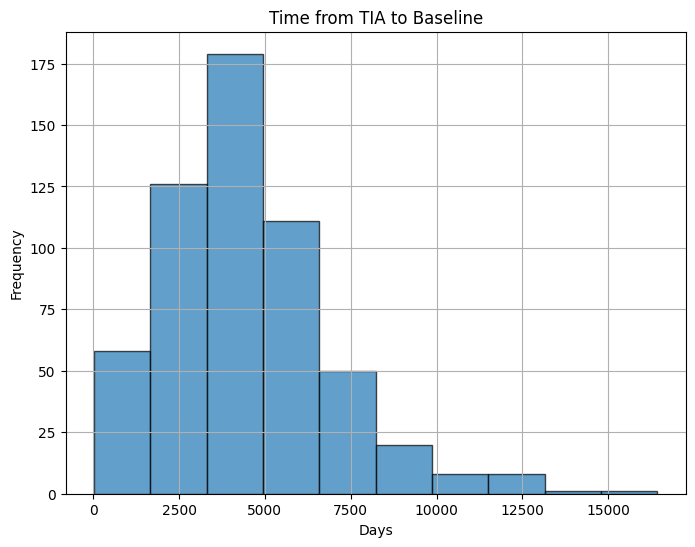

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(cevd_df_first['g45_to_cevdtime'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Time from TIA to Baseline')
plt.grid(True)
plt.show()

In [367]:
median_pretime = cevd_df_first['g45_to_cevdtime'].median()
print(median_pretime)

4234.0


In [368]:
median_pretime = cevd_df_first['g45_to_cevdtime'].quantile(0.25)
print(median_pretime)

2857.0


In [369]:
median_pretime = cevd_df_first['g45_to_cevdtime'].quantile(0.75)
print(median_pretime)

5627.25


In [370]:
oneyear = cevd_df_first[cevd_df_first['g45_to_cevdtime'] < 3650]
len(oneyear)

223

In [371]:
cevd_days = cevd_df_first['cevd_t2e'].sum()
cevd_personyears = cevd_days/365
print(cevd_personyears)

3710.8301369863016


In [372]:
f01_days = cevd_df_first['f01_t2e'].sum()
f01_personyears = f01_days/365
print(f01_personyears)

230.3068493150685


In [373]:
g45_days = cevd_df_first['g45_t2e'].sum()
g45_personyears = g45_days/365
print(g45_personyears)

0.0


In [374]:
g46_days = cevd_df_first['g46_t2e'].sum()
g46_personyears = g46_days/365
print(g46_personyears)

8.175342465753424


In [375]:
h34_days = cevd_df_first['h34_t2e'].sum()
h34_personyears = h34_days/365
print(h34_personyears)

120.37260273972603


In [376]:
i60_days = cevd_df_first['i60_t2e'].sum()
i60_personyears = i60_days/365
print(i60_personyears)

45.484931506849314


In [377]:
i61_days = cevd_df_first['i61_t2e'].sum()
i61_personyears = i61_days/365
print(i61_personyears)

171.9917808219178


In [378]:
i62_days = cevd_df_first['i62_t2e'].sum()
i62_personyears = i62_days/365
print(i62_personyears)

59.81917808219178


In [379]:
i63_days = cevd_df_first['i63_t2e'].sum()
i63_personyears = i63_days/365
print(i63_personyears)

889.1287671232876


In [380]:
i64_days = cevd_df_first['i64_t2e'].sum()
i64_personyears = i64_days/365
print(i64_personyears)

165.9753424657534


In [381]:
i65_days = cevd_df_first['i65_t2e'].sum()
i65_personyears = i65_days/365
print(i65_personyears)

308.64931506849314


In [382]:
i66_days = cevd_df_first['i66_t2e'].sum()
i66_personyears = i66_days/365
print(i66_personyears)

9.717808219178082


In [383]:
i67_days = cevd_df_first['i67_t2e'].sum()
i67_personyears = i67_days/365
print(i67_personyears)

1824.1178082191782


In [384]:
i68_days = cevd_df_first['i68_t2e'].sum()
i68_personyears = i68_days/365
print(i68_personyears)

0.0


In [385]:
i69_days = cevd_df_first['i69_t2e'].sum()
i69_personyears = i69_days/365
print(i69_personyears)

364.7780821917808


In [386]:
#

In [387]:
cevd_df_first['g45_date'] = pd.to_datetime(cevd_df_first['g45_date'])
cevd_df_first['date_i0'] = pd.to_datetime(cevd_df_first['date_i0'])


In [388]:
cevd_df_first['g45_to_baseline'] = cevd_df_first['date_i0']-cevd_df_first['g45_date']


In [389]:
cevd_df_first['g45_to_baseline'] = pd.to_timedelta(cevd_df_first['g45_to_baseline'])


In [390]:
cevd_df_first['g45_t2e_p'].head(4)


39       139.0
1016    3281.0
2023    1964.0
2611    1120.0
Name: g45_t2e_p, dtype: float64

In [391]:
# Sum the timedelta values
sum_timedelta = cevd_df_first['g45_t2e_p'].median()


In [392]:
print(sum_timedelta)


1502.0


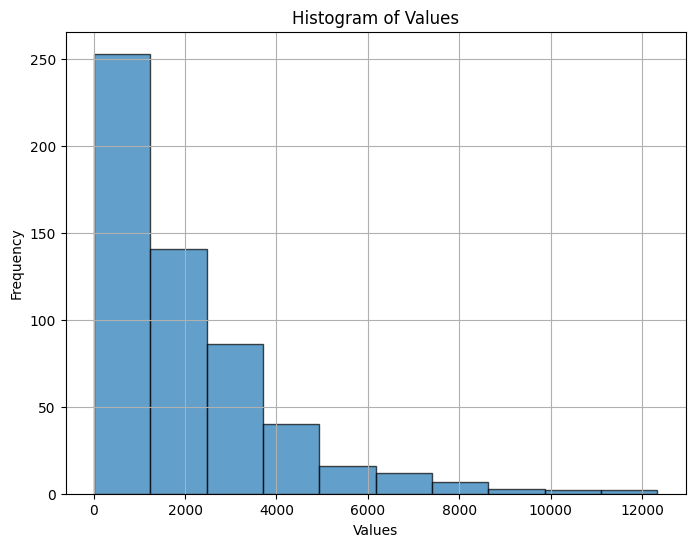

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(cevd_df_first['g45_t2e_p'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid(True)
plt.show()

In [394]:
len(cevd_df_first)

562

In [395]:
median_prior_d = cevd_df_first['g45_t2e_p'].median()
iqr_1_d = cevd_df_first['g45_t2e_p'].quantile(0.25)
iqr_2_d = cevd_df_first['g45_t2e_p'].quantile(0.75)
print('Depressed PP Median:', median_prior_d)
print('Depressed PP IQR:', iqr_1_d, iqr_2_d)

Depressed PP Median: 1502.0
Depressed PP IQR: 630.25 2782.0


In [396]:
cevd_df_first['g45_to_event'] = cevd_df_first['g45_t2e_p']+cevd_df_first['cevd_t2e']

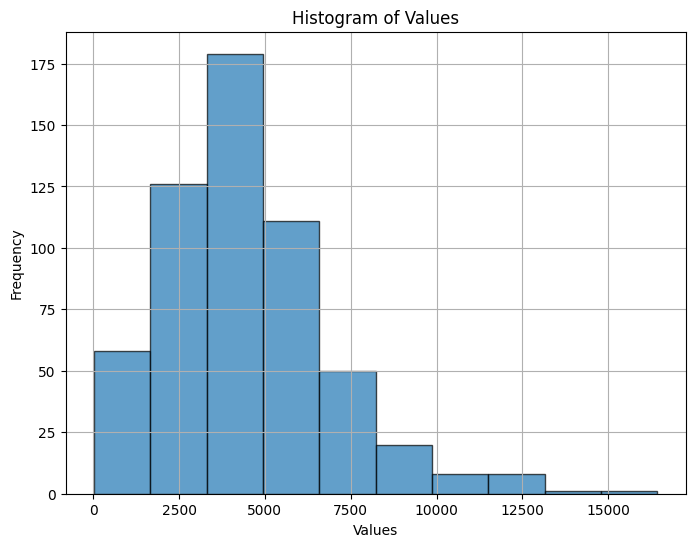

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(cevd_df_first['g45_to_event'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid(True)
plt.show()

In [304]:
#to upload on RAP UKBB
#%%bash
#dx upload <insert file name here>.ipynb --dest /